# <p style="text-align:center;">**AIRBNB LISTINGS BANGKOK ANALYSIS**</p>
### <p style="text-align:center;">**Capstone Modul 2**</p>
---

Berikut adalah library yang akan digunakan dalam memproses/mempersiapkan data. Dataset dapat diakses pada [link berikut](https://drive.google.com/file/d/1c6FJdItxs3SSWrEx5EajEKKd1SgzqJDT/view?usp=drive_link)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats #kolmogorov smirnov
from statsmodels.stats.diagnostic import lilliefors #uji lilliefors
from scipy.stats import shapiro #uji shapiro wilk
from scipy.stats import normaltest #uji D'Agustino Pearson

In [2]:
# Import dataset
df = pd.read_csv('Airbnb Listings Bangkok.csv')

# **Latar Belakang**

> Airbnb, yang didirikan pada tahun 2008, adalah sebuah platform online yang menghubungkan penyewa akomodasi dengan penyedia tempat hunian, seperti rumah atau apartemen, kamar pribadi, hotel, dan kamar bersama. Kehadiran Airbnb telah mengubah cara orang mencari dan memesan tempat tinggal sementara, dengan pengguna terdiri dari host (pemilik properti) dan guest (tamu).

> Menurut data Airbnb yang dikutip oleh juru bicara pemerintah, jumlah wisatawan yang memesan akomodasi melalui Airbnb meningkat sekitar 60%. Fitur akomodasi yang paling dicari oleh wisatawan India melalui Airbnb adalah kolam renang, pantai, taman nasional, dan kota-kota terkenal. Hal ini mengindikasikan bahwa pengguna aplikasi berpeluang semakin bertambah dengan standar keinginan yang semakin tinggi. Persaingan yang semakin ketat juga memaksa pemilik properti untuk lebih kreatif dan strategis dalam menarik tamu. [referensi](https://www.liputan6.com/lifestyle/read/4056210/bangkok-kembali-duduki-peringkat-pertama-kota-tujuan-turis-di-dunia) [Bangkok post](https://www.bangkokpost.com/business/general/2803770/indians-airbnb-bookings-in-thailand-soar)

> Selain itu, regulasi pemerintah, perubahan tren wisata, dan perkembangan teknologi turut mempengaruhi keberhasilan bisnis di Airbnb. Oleh karena itu, memahami dinamika pasar, serta faktor-faktor yang mempengaruhi penawaran dan permintaan, sangat penting bagi pemilik properti dan investor untuk memaksimalkan keuntungan mereka di platform ini.

# **Rumusan Masalah**

>1.  Bagaimana perkembangan Airbnb telah mempengaruhi dinamika pasar akomodasi di Bangkok?

>2. Apa faktor utama yang mendorong peningkatan jumlah wisatawan memesan akomodasi melalui Airbnb, dan bagaimana preferensi akomodasi mereka mempengaruhi strategi pemilik properti dalam menarik tamu?

>3. Apa strategi yang dapat diterapkan oleh pemilik properti di Airbnb untuk tetap kompetitif dalam pasar yang semakin ketat dan dinamis?

# **Data Understanding**

Dataset terdiri atas 17 kolom yang berisi daftar yang berisi informasi `listing` Airbnb yang ada di kota Bangkok dengan kolom utama sebagai berikut:

| **Fitur**                          | **Deskripsi**                            |
|------------------------------------|------------------------------------------|
| **id**                             | Kode unik listing Airbnb.|
| **name**                           | Nama listing.|
| **host_id**                        | Kode unik host Airbnb.                 |
| **host_name**                      | Nama dari host (pemilik) yang menawarkan listing.                     |
| **neighborhood**                   | Lingkungan atau kawasan di Bangkok dimana listing itu berada. |
| **latitude**                       | Garis lintang dari lokasi listing, yang menunjukkan posisi utara-selatan pada peta.                              |
| **longitude**                      | Garis bujur dari lokasi listing, yang menunjukkan posisi timur-barat pada peta.                               |
| **room_type**                      | Jenis kamar yang ditawarkan, misalnya "Entire home/apt" (seluruh rumah/apartemen), "Private room" (kamar pribadi), dan sebagainya. |
| **price**                          | Harga sewa per malam dalam mata uang lokal.|
| **minimum_nights**                 | Jumlah minimal malam untuk menginap dalam listing |
| **number_of_reviews**              | Total jumlah ulasan yang diterima oleh listing dari tamu sebelumnya. |
| **last_review**                    | Tanggal ulasan terakhir yang diterima oleh listing tersebut. |
|**reviews_per_month** | Rata-rata jumlah ulasan yang diterima per bulan.|
| **calculated_host_listings_count** | Jumlah total listing yang dimiliki oleh host tersebut di platform Airbnb.|
| **availability_365**               |  Jumlah hari dalam setahun di mana listing tersebut tersedia untuk dipesan.|
| **number_of_reviews_ltm**          | Jumlah ulasan yang diterima dalam 12 bulan terakhir. |




Berikut adalah informasi tiap kolom:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  float64
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

>- Berikut tipe data yang akan disesuaikan:
 - Tipe data kolom `id` berupa `integer` menjadi `object`
 - Tipe data kolom `last_review` berupa `object` menjadi `datetime`
 - Tipe data kolom `host_id` berupa `integer` menjadi `object`

## Data Unik

In [4]:
# Tampilan 2 data unik pada tiap kolom dan jumlah data unik
def data_unik(df):
    data_unik = pd.DataFrame()
    data_unik ['kolom'] = df.columns
    data_unik ['jumlah data unik'] = [df[kolom].nunique() for kolom in df.columns]
    data_unik ['data unik'] = [df[kolom].unique() for kolom in df.columns]

    data_unik = data_unik.sort_values(by=['jumlah data unik'],ascending=False).reset_index(drop=True)
    data_unik.index += 1
    return data_unik

data_unik(df)

kolom  jumlah data unik  \
1                       Unnamed: 0             15854   
2                               id             15748   
3                             name             14794   
4                        longitude             10214   
5                         latitude              9604   
6                          host_id              6659   
7                        host_name              5312   
8                            price              3040   
9                      last_review              1669   
10               reviews_per_month               513   
11                availability_365               366   
12               number_of_reviews               298   
13                  minimum_nights                86   
14           number_of_reviews_ltm                85   
15                   neighbourhood                50   
16  calculated_host_listings_count                50   
17                       room_type                 4   

                                            data unik  
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
2   [27934.0, 27979.0, 28745.0, 35780.0, 941865.0,...  
3   [Nice room with superb city view, Easy going l...  
4   [100.54134, 100.61674, 100.62402, 100.57256, 1...  
5   [13.75983, 13.66818, 13.75232, 13.78823, 13.76...  
6   [120437, 120541, 123784, 153730, 610315, 21296...  
7   [Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo...  
8   [1905, 1316, 800, 1286, 1000, 1558, 1461, 700,...  
9   [1/6/2020, nan, 4/1/2022, 8/3/2017, 2/3/2014, ...  
10  [0.5, nan, 0.03, 0.17, 0.01, 0.09, 0.19, 1.17,...  
11  [353, 358, 365, 323, 87, 320, 356, 361, 330, 1...  
12  [65, 0, 2, 19, 1, 10, 4, 27, 129, 208, 3, 78, ...  
13  [3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1...  
14  [0, 1, 3, 13, 2, 7, 5, 10, 9, 12, 29, 4, 19, 5...  
15  [Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B...  
16  [2, 1, 3, 41, 10, 7, 6, 4, 37, 8, 19, 5, 53, 4...  
17  [Entire home/apt, Private room, Hotel room, Sh...

**Pengamatan:**
>- Secara umum, data sudah diinput dengan format yang konsisten
>- Terdapat data `NaN` dan nilai `0` di beberapa kolom 
>- Terdapat kolom `Unnamed: 0` yang merupakan indeks dari data. Karena hanya merupakan nomor urut, maka nanti akan di drop



## Missing value
Selanjutnya kita akan memvisualisasikan missing value, kemudian mengidentifikasi jumlahnya

<Axes: >

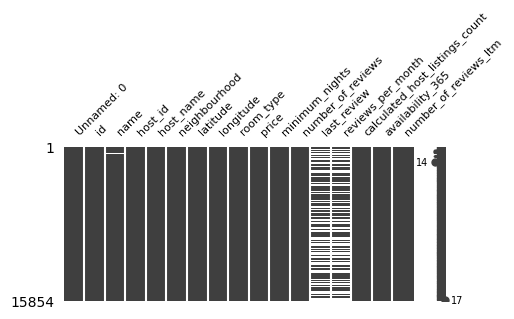

In [5]:
missingno.matrix(df, figsize=(5,2), fontsize=8)

In [6]:
# identifikasi missing value
def missing_value(data):
    jumlah_misval = data.isnull().sum()
    proporsi_misval = ((jumlah_misval/len(data))*100).round(2).astype(str)+'%'
    tabel = pd.concat([jumlah_misval,proporsi_misval],axis=1)
    tabel.columns = ['jumlah missing values','proporsi missing values']
    tabel = tabel[tabel['jumlah missing values'] != 0].sort_values('proporsi missing values',ascending=False).round(2)
    return tabel
print('Jumlah missing value: ', df.isna().sum().sum())
df_misval = missing_value(df)
display (df_misval)

Jumlah missing value:  11589


jumlah missing values proporsi missing values
last_review                         5790                  36.52%
reviews_per_month                   5790                  36.52%
name                                   8                   0.05%
host_name                              1                   0.01%

**Pengamatan**
>- Terdapat terdapat 4 kolom missing value (seperti yang ditunjukkan pada tabel diatas)
>- Kolom `last_review`, dan `reviews_per_month`memiliki missing value cukup besar 36.52%, yang mungkin mengindikasikan bahwa mayoritas data review tidak dientri


Melalui data informasi listing host/pemilik, kita menggunakan variabel `harga` dan `minimum_night` untuk mengidentifikasi data kosong. Karena Pelanggan yang membeli/mengeluarkan uang atas barang mahal mungkin merasa lebih terdorong untuk memberikan ulasan untuk memvalidasi pembelian mereka atau untuk memperingatkan orang lain jika produk tersebut tidak memenuhi ekspektasi

Pertama, kita akan mengecek data kosong pada variabel 
#### `last_review` dan `review_per_month`

In [7]:
df_price = df.sort_values(by='price',ascending= False) #urutkan atas variabel price
misval_last_review = df[df['last_review'].isna()]
display(misval_last_review.head(),misval_last_review.tail())

Unnamed: 0         id                                name  host_id  \
1            1    27979.0      Easy going landlord,easy place   120541   
2            2    28745.0   modern-style apartment in Bangkok   123784   
4            4   941865.0          Suite Room 3 at MetroPoint   610315   
7            7  1738669.0     1 chic bedroom apartment in BKK  7045870   
14          14   959254.0  Deluxe Condo, Nana, Pool/GYM/Sauna  5153476   

     host_name neighbourhood  latitude  longitude        room_type  price  \
1          Emy       Bang Na  13.66818  100.61674     Private room   1316   
2   Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
4        Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   
7     Jiraporn    Chatu Chak  13.82925  100.56737  Entire home/apt   1461   
14      Natcha   Khlong Toei  13.71516  100.56806  Entire home/apt   1400   

    minimum_nights  number_of_reviews last_review  reviews_per_month  \
1                1                  0         NaN                NaN   
2               60                  0         NaN                NaN   
4                1                  0         NaN                NaN   
7                1                  0         NaN                NaN   
14              30                  0         NaN                NaN   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1                                2               358                      0  
2                                1               365                      0  
4                                3               365                      0  
7                                1               365                      0  
14                               1               365                      0

Unnamed: 0            id  \
15849       15849  7.904650e+17   
15850       15850  7.904750e+17   
15851       15851  7.904750e+17   
15852       15852  7.904760e+17   
15853       15853  7.904760e+17   

                                                    name    host_id  \
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

**Pengamatan**

Jika dilihat dari 5 data teratas dan terbawah berdasarkan kondisi yang sudah dijelaskan, terlihat bahwa: 
>- Listing yang memiliki nilai tertinggi 300.000 THB - 1.100.000 THB (Rp13.547.304,00 - Rp49.673.448,00) dengan tiap minimum_night 14 dan 365 malam
>- listing yang memiliki nilai terendah 278 THB - 280 THB (Rp125.538,35 - Rp126.441,50) dengan minimum_night 1

Kedua kondisi tersebut mempelihatkan kecenderungan habit Penyewa yang tidak mengentri review dengan jumlah 36,52%. 
Melihat kondisi tersebut, maka tidak disarankan untuk mengisi/menggantikan data NaN atas kolom `last_review`, dan `reviews_per_month`  
 

Kedua mengecek kolom
#### `name`

In [8]:
# melihat data kosong pada variabel `name`
misval_name = df[df['name'].isna()][['name','host_name', 'neighbourhood', 'room_type','calculated_host_listings_count','price']]
misval_name

name        host_name neighbourhood        room_type  \
439   NaN          Titawan  Phra Khanong     Private room   
544   NaN           Cherry     Din Daeng     Private room   
572   NaN        Parichart    Bang Phlat     Private room   
669   NaN            Chira       Bang Na  Entire home/apt   
1030  NaN          Nantida       Vadhana     Private room   
1282  NaN  Diamond Bangkok   Ratchathewi     Private room   
1594  NaN      Khaneungnit       Vadhana     Private room   
2075  NaN         Pakaphol   Khlong Toei     Private room   

      calculated_host_listings_count  price  
439                                1   1080  
544                                1   1200  
572                                1   1200  
669                                1   2424  
1030                               1   5000  
1282                               1    930  
1594                               1   1000  
2075                               3    850

Dari 8 data atas kolom `name` yang kosong, terdapat 1 data yang hostnya memiliki 3 listing yaitu `Pakaphol`, 
sementara host yang lainnya hanya memiliki 1 listing saja dan tidak begitu popular. 
Melalui [link berikut](https://insideairbnb.com/bangkok/), tidak ditemukan data pendukungnya atas 7 host name lainnya.

In [9]:
#cek name atas host_name Pakhapol
misval_name_pakaphol = df[df['host_name'] == 'Pakaphol']
misval_name_pakaphol


Unnamed: 0          id                name   host_id host_name  \
1981        1981  13400326.0  Errday Guest House  73275200  Pakaphol   
1982        1982  13400758.0  Errday Guest House  73275200  Pakaphol   
2075        2075  13142743.0                 NaN  73275200  Pakaphol   

     neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
1981   Khlong Toei  13.72427  100.56443  Private room    950               1   
1982   Khlong Toei  13.72373  100.56415  Private room  36363               1   
2075   Khlong Toei  13.72566  100.56416  Private room    850               1   

      number_of_reviews last_review  reviews_per_month  \
1981                  1   2/19/2020               0.03   
1982                  0         NaN                NaN   
2075                  2  12/11/2017               0.03   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1981                               3                 1                      0  
1982                               3                 1                      0  
2075                               3               220                      0

**Pengamatan**

Data `host_name Pakaphol` menunjukkan keterangan yang sama sehingga diasumsikan memiliki `nama listing` yang sama 



Terakhir mengecek kolom
#### `host_name`

In [10]:
# melihat data kosong pada variabel `host_name`
misval_host_name = df[df['host_name'].isna()][['host_name', 'neighbourhood', 'room_type','calculated_host_listings_count','name','latitude', 'longitude','price']]
misval_name
misval_host_name

host_name neighbourhood     room_type  calculated_host_listings_count  \
3571       NaN     Bang Kapi  Private room                               1   

               name  latitude  longitude  price  
3571  Cozy Hideaway  13.76999  100.63769   1399

seletah dilakukan pengecekan dari google maps dan data Airbnb, tidak ditemukan dengan keterangan tersebut. Jumlah listing yang tercatat hanya satu sehingga sulit untuk mengidentifikasinya

## Data Duplikat

In [11]:
# Cek data duplikat secara keseluruhan
duplicate_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicate_rows}')

Jumlah baris duplikat: 0


In [12]:
## Cek data duplikat berdasarkan kolom tertentu (menggunakan semua kolom kecuali kolom `id`)
data_duplikat = df[df.duplicated(subset=['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'], keep=False)]
display(f'Jumlah data duplikat: {len(data_duplikat)} (atas selain kolom id)')
#data_duplikat.sort_values(by='host_name')

'Jumlah data duplikat: 18 (atas selain kolom id)'

In [13]:
# Hitung jumlah `id` melalui pengelompokan data duplikat
data_duplikat.groupby(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'])[['id']].count().sort_values(by='host_name')

id
name                                               host_id   host_name neighbourhood latitude  longitude  room_type       price minimum_nights calculated_host_listings_count availability_365 number_of_reviews_ltm    
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    344327171 Alice     Huai Khwang   13.757097 100.568486 Entire home/apt 2533  3              40                             360              0                       2
Sathon Luxury 2 br/China Town/Icon Siam            344327171 Alice     Sathon        13.710777 100.519891 Entire home/apt 2221  1              40                             340              0                       2
New! Gateway/ Bangkok University 1BR 2PPL near BTS 201677068 Curry     Khlong Toei   13.716847 100.584781 Entire home/apt 2099  1              228                            362              3                       2
                                                   314945555 Nana      Khlong Toei   13.716669 100.584967 Entire home/apt 2099  1              49                             362              2                       2
Family Room for 4 People                           340188343 Rachan    Vadhana       13.740168 100.556320 Private room    2237  1              14                             360              0                       2
small1                                             97598307  Soo       Don Mueang    13.920720 100.575780 Shared room     350   1              4                              180              0                       2
Sathon Luxury 2 br/China Town/Icon Siam            264864968 Tricia    Sathon        13.710777 100.519891 Entire home/apt 2221  1              44                             340              0                       2
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    20133201  Willam    Huai Khwang   13.756184 100.568269 Entire home/apt 2533  3              33                             360              0                       2
NA BANGLAMPOO GUEST HOUSE                          87704107  Yui       Phra Nakhon   13.762790 100.497900 Private room    1400  1              9                              361              0                       2

**Pengamatan**

Data duplikat memiliki keterangan yang sama selain `id` sehingga disarankan untuk dihapus

Sebelum memahami data secara statistika, kita akan melakukan `pre-cleaning` dulu agar tidak keliru dalam memahami tiap variabel

In [14]:
# Penyesuaian tipe data menjadi format yang benar
df = df.copy()
df['id'] = df['id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_id'] = df['host_id'].astype(str)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

## Data harga `0` value

kita akan mengecek apakah ada harga yang bernilai `0`

In [15]:
# Menampilkan semua baris di mana kolom 'price' bernilai 0
data_zero_price = df[df['price'] == 0]

# Menampilkan hasil
data_zero_price



id                           name    host_id  \
11103  44563108.0  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

terdapat 1listing yang memiliki harga , dengan tipe rauangan hotel dan berada di kawasan vadhana

## Variabel Numerik

### Statistika Deskriptif

In [16]:
print('Deskripsi atas variabel numerik')
display(df.describe())

Deskripsi atas variabel numerik


latitude     longitude         price  minimum_nights  \
count  15854.000000  15854.000000  1.585400e+04    15854.000000   
mean      13.745144    100.559903  3.217704e+03       15.292355   
min       13.527300    100.329550  0.000000e+00        1.000000   
25%       13.720090    100.529690  9.000000e+02        1.000000   
50%       13.738490    100.561415  1.429000e+03        1.000000   
75%       13.759497    100.585150  2.429000e+03        7.000000   
max       13.953540    100.923440  1.100000e+06     1125.000000   
std        0.043040      0.050911  2.497212e+04       50.815020   

       number_of_reviews                    last_review  reviews_per_month  \
count       15854.000000                          10064       10064.000000   
mean           16.654157  2021-08-30 08:37:49.316375296           0.813145   
min             0.000000            2012-12-15 00:00:00           0.010000   
25%             0.000000            2020-02-20 00:00:00           0.120000   
50%             2.000000            2022-10-24 00:00:00           0.435000   
75%            13.000000            2022-12-08 00:00:00           1.060000   
max          1224.000000            2022-12-28 00:00:00          19.130000   
std            40.613331                            NaN           1.090196   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000  
std                         30.269848        125.843224               8.916937

**Pengamatan:**
>- Dataset atas `variabel numerik` menunjukkan variansi yang signifikan pada `harga`, `jumlah malam minimum`, dan `jumlah ulasan` di Bangkok. Beberapa kolom seperti `price`, `number_of_review`, `availability_365`, dan `jumlah review 12 bulan terakhir` memiliki nilai minimum 0 tapi juga memiliki nilai maksimum yang cukup tinggi


### Distribusi Data

Melalui data tersebut, kita akan melakukan uji distribusi terhadap `variabel kontinu`.  Beberapa kolom, meskipun bilangan bulat, sering diperlakukan sebagai kontinu karena rentangnya yang besar atau sifat analisis yang memerlukan pendekatan tersebut.

#### Grafik Histogram

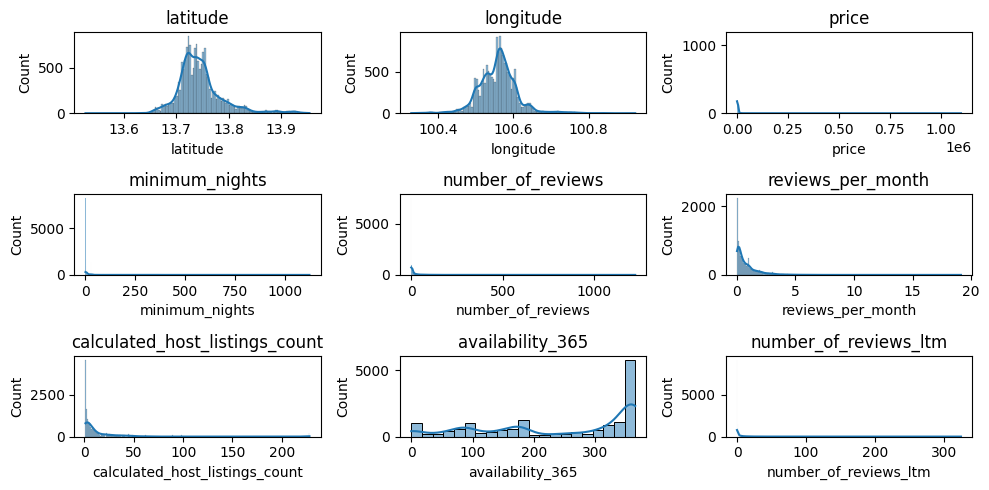

In [17]:
# Visualisasi distribusi data dengan menggunakan hisplot
data_numerik = df.select_dtypes(include='number')
plt.figure(figsize=(10, 5))

posisi = 1
for kolom in data_numerik.columns:
    plt.subplot(3, 3, posisi)
    sns.histplot(df[kolom], kde=True)
    plt.title(kolom)
    posisi += 1

plt.tight_layout()

#### Uji Statistika

Kita akan melakukan beberapa uji statistika dengan melakukan `drop sementara` data `missing value`

In [18]:
df_copy = df.copy()
df_copy.dropna(inplace = True)

In [19]:
# Uji dilakukan untuk mengetahui jenis distribusi data
data = df_copy.select_dtypes(include='number')
print('Uji Kolmogorov Smirnov')
for setiap_kolom in data.columns:
    stat, pval = stats.kstest(data[setiap_kolom], 'norm')
    if pval > 0.05:
        print(f'Kolom {setiap_kolom} tidak memiliki cukup bukti menolak hipotesis 0 (DISTRIBUSI NORMAL, p-val: {pval:.4f})')
    else:
        print(f'Kolom {setiap_kolom} memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: {pval:.4f})')

print('\nUji Lilliefors')
for setiap_kolom in data.columns:
    stat, pval = lilliefors(data[setiap_kolom])
    if pval > 0.05:
        print(f'Kolom {setiap_kolom} tidak memiliki cukup bukti menolak hipotesis 0 (DISTRIBUSI NORMAL, p-val: {pval:.4f})')
    else:
        print(f'Kolom {setiap_kolom} memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: {pval:.4f})')

print('\nUji Shapiro')
for setiap_kolom in data.columns:
    stat, pval = shapiro(data[setiap_kolom])
    if pval > 0.05:
        print(f'Kolom {setiap_kolom} tidak memiliki cukup bukti menolak hipotesis 0 (DISTRIBUSI NORMAL, p-val: {pval:.4f})')
    else:
        print(f'Kolom {setiap_kolom} memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: {pval:.4f})')

print('\nUji D\'Agustino Pearson')
for setiap_kolom in data.columns:
    stat, pval = normaltest(data[setiap_kolom])
    if pval > 0.05:
        print(f'Kolom {setiap_kolom} tidak memiliki cukup bukti menolak hipotesis 0 (DISTRIBUSI NORMAL, p-val: {pval:.4f})')
    else:
        print(f'Kolom {setiap_kolom} memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: {pval:.4f})')


Uji Kolmogorov Smirnov
Kolom latitude memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom longitude memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom price memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom minimum_nights memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom number_of_reviews memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom reviews_per_month memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom calculated_host_listings_count memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom availability_365 memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)
Kolom number_of_reviews_ltm memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0000)

Uji Lilliefors
Kolom latitude memiliki cukup bukti menolak hipotesis 0 (TIDAK NORMAL, p-val: 0.0010)
Kolom longitude memiliki cukup bukti

c:\Users\irma.manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10061.
  res = hypotest_fun_out(*samples, **kwds)


**Pengamatan**

Semua variabel dengan kategori `numerik` ternyata berdistribusi `Tidak Normal`

#### Outliers

Kita akan mengecek outlier dengan menggunakan
##### Grafik Boxplot

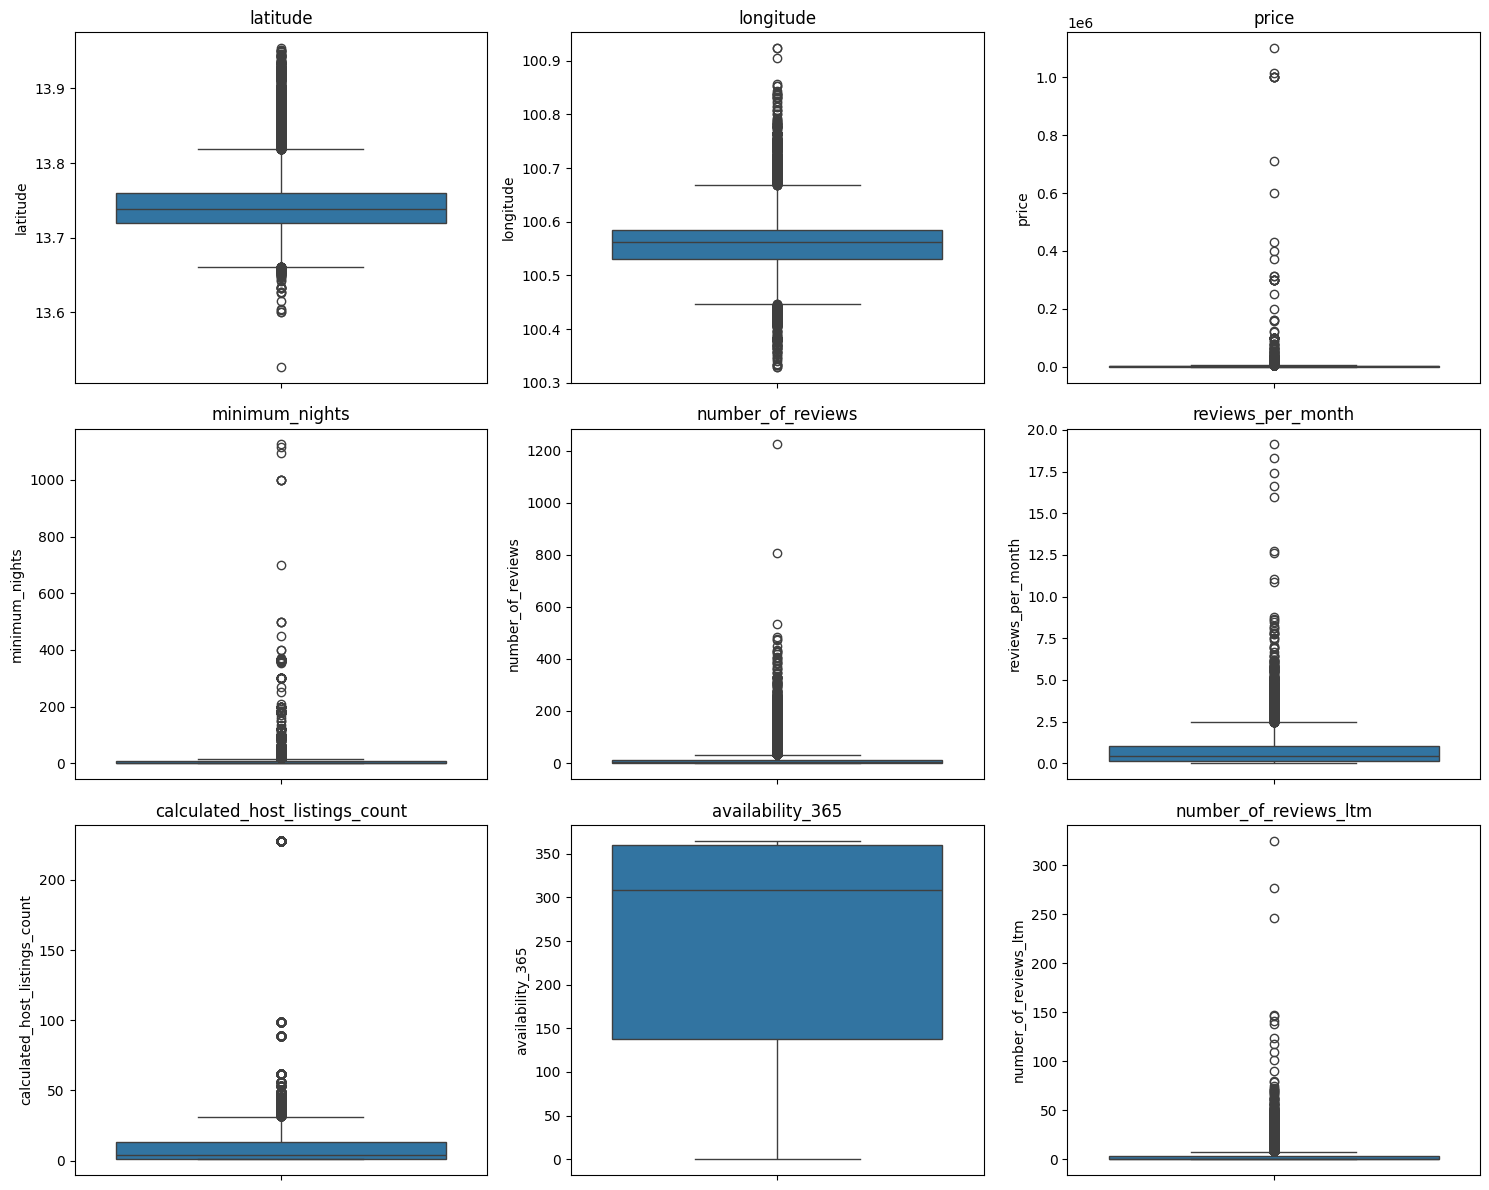

In [20]:
# Visualisasi outlier dengan menggunakan boxplot
numerik = df.select_dtypes(include='number')
plt.figure(figsize=(15, 12))

posisi = 1
for kolom in numerik.columns:
    plt.subplot(3, 3, posisi)
    sns.boxplot(df[kolom])
    plt.title(kolom)
    posisi += 1

plt.tight_layout()
plt.show()

**Pengamatan**
>- Hampir semua variabel memiliki outliers yang signifikan, mengindikasikan adanya nilai ekstrem yang perlu diperhatikan
>- Mayoritas data terkonsentrasi dalam rentang tertentu dan beberapa nilai menyimpang jauh dari mayoritas, hal ini menunjukkan variansi yang besar
>- Beberapa kolom terkonsentrasi pada `area 0`

##### IQR (Inter Quartile Range) * 1.5

In [21]:
# Cek jumlah batas atas dan batas bawah
numerik = df.select_dtypes(include='number')
list_jumlah_outliers = []
list_batas_atas = []
list_batas_bawah = []

def IQR_outlier(data_clean):
    for setiap_kolom in numerik.columns:
        q3 = numerik.describe()[setiap_kolom]['75%']
        q1 = numerik.describe()[setiap_kolom]['25%']
        iqr = q3 - q1
        whisker = 1.5 * iqr
        batas_atas= q3 + whisker
        batas_bawah = q1 - whisker

        jumlah_outliers = len(numerik[(numerik[setiap_kolom] > batas_atas) | (numerik[setiap_kolom] < batas_bawah)])
        list_jumlah_outliers.append(jumlah_outliers)
        list_batas_atas.append(batas_atas)
        list_batas_bawah.append(batas_bawah)

    return pd.DataFrame({
                    'kolom': numerik.columns,
                    'jumlah outliers': list_jumlah_outliers,
                    'batas atas': list_batas_atas,
                    'batas bawah': list_batas_bawah

})
outlier_data = IQR_outlier(df).sort_values(by='jumlah outliers', ascending=False)
outlier_data

kolom  jumlah outliers   batas atas  batas bawah
3                  minimum_nights             3168    16.000000    -8.000000
4               number_of_reviews             2240    32.500000   -19.500000
8           number_of_reviews_ltm             2219     7.500000    -4.500000
6  calculated_host_listings_count             1832    31.000000   -17.000000
2                           price             1403  4722.500000 -1393.500000
0                        latitude             1095    13.818609    13.660979
5               reviews_per_month              693     2.470000    -1.290000
1                       longitude              602   100.668340   100.446500
7                availability_365                0   693.000000  -195.000000

Kita akan mengecek outlier kolom
##### Outlier `price` berdasarkan tipe kamar

Text(0, 0.5, 'Harga')

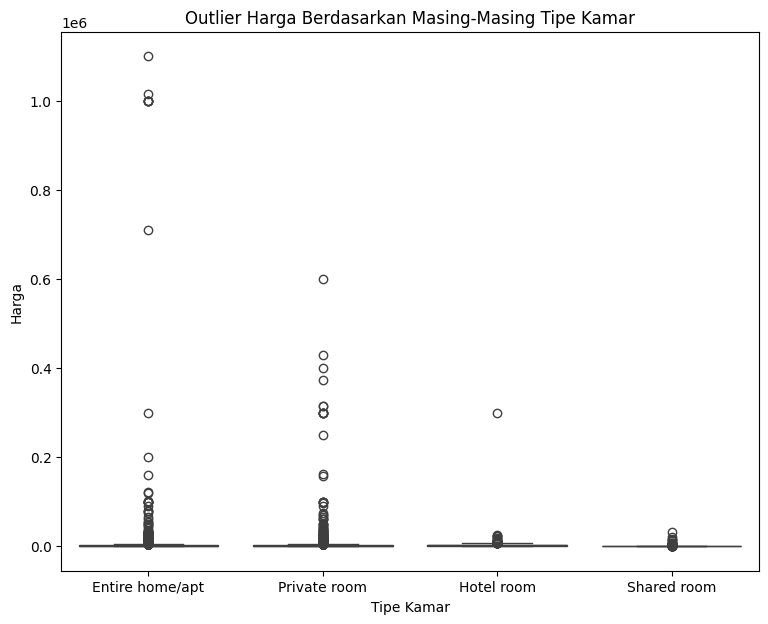

In [22]:
plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Outlier Harga Berdasarkan Masing-Masing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

Ada sejumlah outlier yang sangat jelas terlihat di bagian atas grafik memiliki nilai yang jauh lebih tinggi dibandingkan dengan mayoritas data.

Kita akan melakukan `pengecekan`, apakah benar harganya memang `signifikan lebih tinggi` dari mayoritas harga pada data.
> Perlu diperhatikan bahwa price yang dimaksud dalam data bergantung pada minimum_night yang ditentukan oleh host. Jadi, `tidak disarankan membandingkan price tiap listing`.

>`Perbandingan yang tepat adalah dengan membandingkan price/night ` yang  merupakan harga hunian tiap malam. Karena banyak wisatawan mencari pengalaman yang lebih mirip dengan tinggal di rumah sendiri, dengan keluarga atau dalam kelompok, dan pastinya mereka akan mempertimbangkan harga per malamnya untuk penghematan.
[referensi](https://airbtics.com/annual-airbnb-revenue-in-bangkok-thailand/)

In [23]:
# Data diurutkan berdasarkan Price tertinggi
df_cek_harga = df.sort_values(by='price', ascending=False)

# Hitung 'price/night'
df_cek_harga['price/night'] = df_cek_harga['price'] / df_cek_harga['minimum_nights']

# Hitung rata-rata 'price/night' untuk setiap 'neighbourhood'
avg_price_per_neighbourhood = df_cek_harga.groupby(['neighbourhood','room_type'])['price/night'].mean().reset_index()
avg_price_per_neighbourhood.columns = ['neighbourhood','room_type', 'price/night_per_neighbourhood']

# Gabungkan rata-rata harga dengan DataFrame utama
df_cek_harga = pd.merge(df_cek_harga, avg_price_per_neighbourhood, on=['neighbourhood','room_type'], how='left')
df_cek_harga ['persentase delta avg price'] = (df_cek_harga['price/night'] / df_cek_harga['price/night_per_neighbourhood']-1).round(2)
df_cek_harga = df_cek_harga[['neighbourhood', 'room_type', 'minimum_nights', 'price', 'price/night', 'price/night_per_neighbourhood','persentase delta avg price']]

df_cek_harga = df_cek_harga[df_cek_harga['price'] > 4000].reset_index(drop=True)
df_cek_harga.index = df_cek_harga.index + 1
display(df_cek_harga.head(10))

neighbourhood        room_type  minimum_nights    price     price/night  \
1        Vadhana  Entire home/apt              14  1100000    78571.428571   
2        Vadhana  Entire home/apt              30  1014758    33825.266667   
3    Khlong Toei  Entire home/apt               2  1000000   500000.000000   
4    Khlong Toei  Entire home/apt              25  1000000    40000.000000   
5    Huai Khwang  Entire home/apt             100  1000000    10000.000000   
6    Huai Khwang  Entire home/apt               1  1000000  1000000.000000   
7    Huai Khwang  Entire home/apt             100  1000000    10000.000000   
8     Khlong San  Entire home/apt              12   710760    59230.000000   
9     Bang Phlat     Private room               1   600700   600700.000000   
10     Bang Kapi     Private room               1   429443   429443.000000   

    price/night_per_neighbourhood  persentase delta avg price  
1                     1779.122060                       43.16  
2                     1779.122060                       18.01  
3                     1879.224565                      265.07  
4                     1879.224565                       20.29  
5                     2560.305536                        2.91  
6                     2560.305536                      389.58  
7                     2560.305536                        2.91  
8                     1720.673365                       33.42  
9                    14468.870289                       40.52  
10                    4223.581988                      100.68

> Hasil diatas adalah 10 listing dengan harga tertinggi diatas batas atas. Jika dibandingkan dengan kawasan dan tipe kamar yang sama, ternyata faktor yang mempengaruhi `price` adalah `minimum_night` dan `neighbourhood`.  

In [24]:
# Data diurutkan berdasarkan Price/Night tertinggi
df_cek_harga2 =df_cek_harga.sort_values(by='persentase delta avg price',ascending=False)[['neighbourhood','room_type', 'minimum_nights', 'price','price/night','price/night_per_neighbourhood','persentase delta avg price']]
df_cek_harga2.head(10)

neighbourhood        room_type  minimum_nights    price  price/night  \
6    Huai Khwang  Entire home/apt               1  1000000    1000000.0   
3    Khlong Toei  Entire home/apt               2  1000000     500000.0   
23        Sathon  Entire home/apt               1   200000     200000.0   
10     Bang Kapi     Private room               1   429443     429443.0   
22       Vadhana     Private room               1   250344     250344.0   
12   Khlong Toei     Private room               1   372227     372227.0   
16   Ratchathewi     Private room               1   300000     300000.0   
17   Ratchathewi     Private room               1   300000     300000.0   
18   Ratchathewi     Private room               1   300000     300000.0   
13   Khlong Toei     Private room               1   314899     314899.0   

    price/night_per_neighbourhood  persentase delta avg price  
6                     2560.305536                      389.58  
3                     1879.224565                      265.07  
23                    1694.849057                      117.00  
10                    4223.581988                      100.68  
22                    3228.515898                       76.54  
12                    4862.665965                       75.55  
16                    4606.818434                       64.12  
17                    4606.818434                       64.12  
18                    4606.818434                       64.12  
13                    4862.665965                       63.76

**Pengamatan**
> jika di diurutkan berdasarkan persentase selisih harga per malam tiap listing dengan avg harga per malam tiap tipekamar dan kawasan, ternyata Outlier yang paling jauh dengan batas maksimum memiliki harga wajar dan beberapa outlier yang memiliki harga tinggi dipengaruhi oleh minimum_nights yang rendah untuk tipe kamar yang biasanya digunakan sebagai hunian berkelompok

In [25]:
from scipy.stats import kruskal

# cek dengan uji statistika

H0 = "median nilai Entire home/apt = Private room = Hotel room ='Shared room"
Ha = "paling tidak ada salah satu variabel yang berbeda signifikan"
stats, pval = kruskal(df_cek_harga2[df_cek_harga2['room_type']=='Entire home/apt']['price/night_per_neighbourhood'],
                       df_cek_harga2[df_cek_harga2['room_type']=='Hotel room']['price/night_per_neighbourhood'],
                       df_cek_harga2[df_cek_harga2['room_type']=='Private room']['price/night_per_neighbourhood'],
                       df_cek_harga2[df_cek_harga2['room_type']=='Shared room']['price/night_per_neighbourhood'])

if pval > 0.05:
    print(f"H0 diterima: {H0} (pvalue = {pval})")
else:
    print(f"H0 ditolak: {Ha} (pvalue = {pval})")

H0 ditolak: paling tidak ada salah satu variabel yang berbeda signifikan (pvalue = 4.292877502356276e-95)


> Hasil uji  statistika inferensial juga membuktikan bahwa tidak terdapat perbedaan yang signifikan antar variabel harga tipe kamar

> Melalui analisa diatas, `tidak dilakukan penghapusan outlier harga karena kewajaran harga`

### Korelasi

Kita akan menggunakan korelasi `Spearman` karena data listing Airbnb memiliki banyak outlier dan tidak normal

<Axes: >

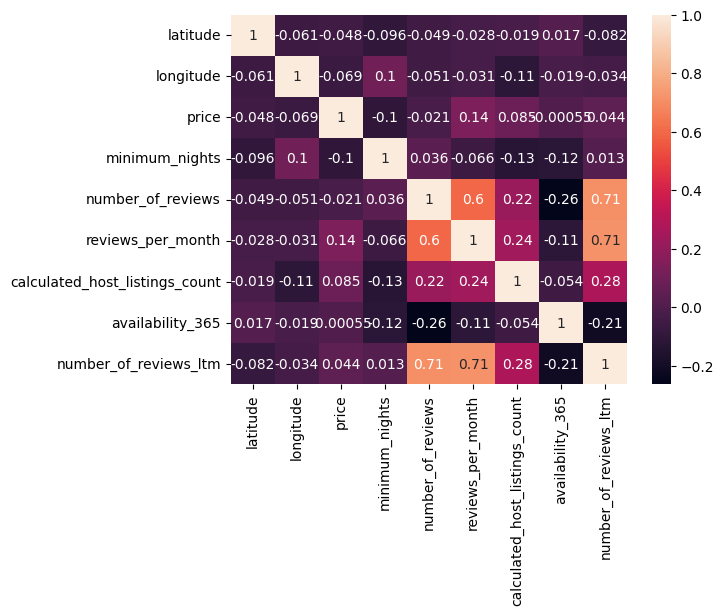

In [26]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

**Pengamatan**

>- `number_of_reviews` dengan `number_of_reviews_ltm` dan `reviews_per_month` memiliki `korelasi positif` menunjukkan bahwa listing yang memiliki lebih banyak ulasan cenderung terus mendapatkan ulasan secara teratur setiap bulan
>- `availability_365` dan `number_of_reviews_ltm` memiliki `korelasi negatif` menunjukkan bahwa semakin tinggi ketersediaan listing, semakin sedikit ulasan yang diterima dalam jangka panjang
>- `latitude` dan `longitude` dengan variabel lain lemah, yang menunjukkan bahwa lokasi geografis (dalam hal koordinat) mungkin tidak memainkan peran yang signifikan dalam banyak faktor lainnya seperti harga atau jumlah ulasan
>- `price` dengan variabel lain menunjukkan korelasi yang lemah dengan hampir semua variabel lain, menunjukkan bahwa harga tidak banyak dipengaruhi oleh variabel seperti jumlah ulasan, ketersediaan, atau jumlah listing host.

## Variable Kategorik

### Statistika Deskriptif

In [27]:
print('\nDeskripsi atas variabel kategorik')
display(df.describe(include='object'))


Deskripsi atas variabel kategorik


id                                              name  \
count         15854                                             15846   
unique        15748                                             14794   
top     6.65689e+17  New!  La Chada Night Market studio 2PPL near MRT   
freq              5                                                45   

          host_id host_name neighbourhood        room_type  
count       15854     15853         15854            15854  
unique       6659      5312            50                4  
top     201677068     Curry       Vadhana  Entire home/apt  
freq          228       228          2153             8912

>- Dataset atas `variabel kategorik` menunjukkan `New! La Chada Night Market studio 2PPL near MRT` adalah listing yang paling sering muncul, `Nama host`dengan freq 228 yang menujukkan paling banyak memiliki listing adalah `Curry`, area yang paling populer dengan freq 2153 adalah `Vadhana`,tipe ruangan yang paling diminati/umum adalah `home/apt` dengan freq yang sangat tinggi 8912 kali

#### Barchart

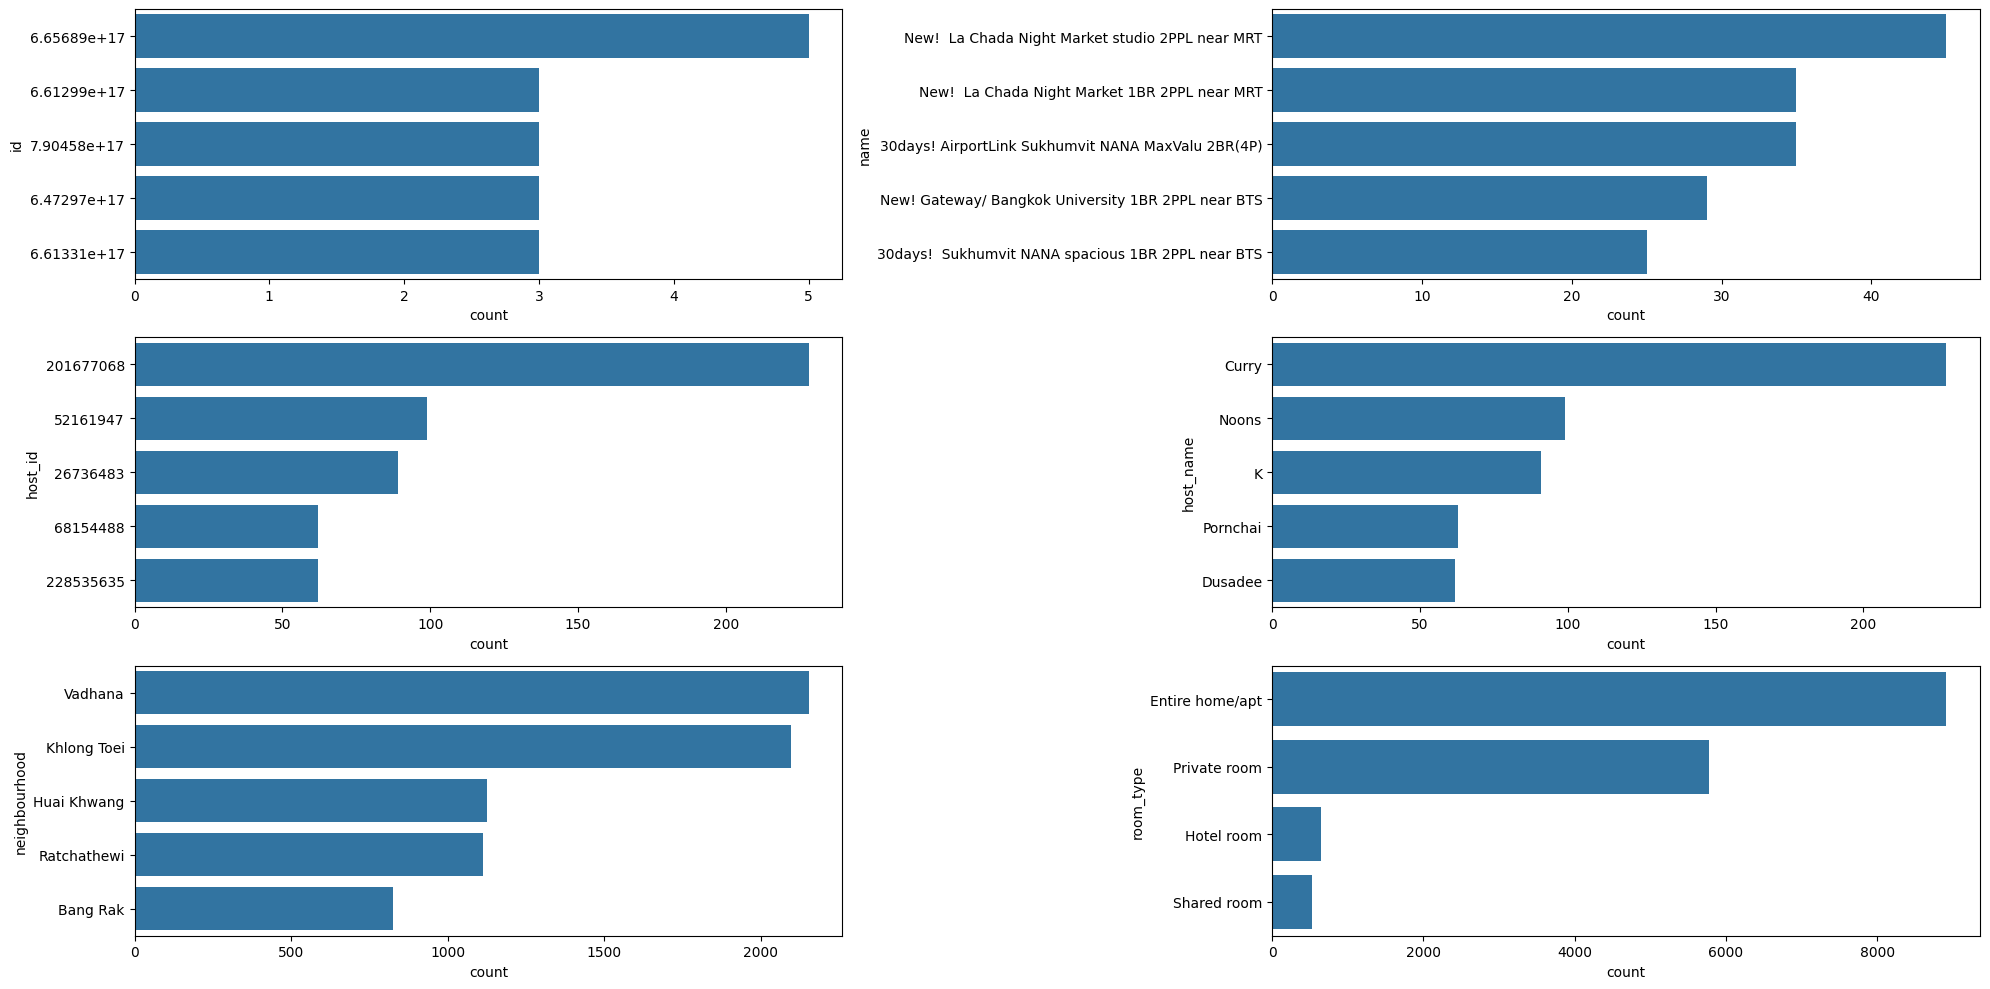

In [28]:
# visualisasi distribusi data kategorik dengan menggunakan barchart
kategorik = df.select_dtypes(include='object')
plt.figure(figsize=(20,10))

posisi =1
for data_kolom in kategorik.columns:
    plt.subplot(3,2,posisi)
    sns.barplot(df[data_kolom].value_counts().head(5),orient="h")
    posisi = posisi + 1
    plt.tight_layout()


**Pengamatan**
>- Terdapat pola tertentu dalam data di mana beberapa properti atau host mendominasi dengan banyaknya listing yang muncul.
>- Preferensi untuk Entire home/apt menunjukkan kecenderungan penyewa untuk memilih privasi dan ruang yang lebih besar dibandingkan kamar privat atau jenis kamar lainnya.
>- Sebagian besar listing terkonsentrasi di beberapa daerah tertentu, yang mungkin merupakan wilayah yang lebih menarik atau memiliki permintaan yang tinggi.

# **Data cleaning**

In [29]:
#copy data
data_clean = df.copy()

Melalui proses data understanding, maka akan dilakukan proses sbb:

## Missing value ulasan

> 1. Menghapus kolom `last_review` dan `review_per_month`

In [30]:
# Batas/threshold = 20%
threshold = 0.2
data_clean = df[df.columns[df.isnull().mean() < threshold]]
data_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

## Missing value nama

In [31]:
# Mengubah nilai NaN pada kolom 'name' untuk host dengan nama 'Pakaphol'
data_clean.loc[(data_clean['host_name'] == 'Pakaphol') & (data_clean['name'].isna()), 'name'] = 'Errday Guest House'

# Menampilkan hasil perubahan
data_clean[data_clean['host_name'] == 'Pakaphol']


id                name   host_id host_name neighbourhood  \
1981  13400326.0  Errday Guest House  73275200  Pakaphol   Khlong Toei   
1982  13400758.0  Errday Guest House  73275200  Pakaphol   Khlong Toei   
2075  13142743.0  Errday Guest House  73275200  Pakaphol   Khlong Toei   

      latitude  longitude     room_type  price  minimum_nights  \
1981  13.72427  100.56443  Private room    950               1   
1982  13.72373  100.56415  Private room  36363               1   
2075  13.72566  100.56416  Private room    850               1   

      number_of_reviews  calculated_host_listings_count  availability_365  \
1981                  1                               3                 1   
1982                  0                               3                 1   
2075                  2                               3               220   

      number_of_reviews_ltm  
1981                      0  
1982                      0  
2075                      0

In [32]:
# Membuat salinan eksplisit dari DataFrame (jika diperlukan)
data_clean = data_clean.copy()

# Mengisi NaN dengan nilai tertentu 
data_clean['name'] = data_clean['name'].fillna('Unknown Listing')

In [33]:
#cek sisa data kosong
data_clean['name'].isna().sum()

np.int64(0)

## Missing value host_name

In [34]:
# Mengisi NaN dengan nilai tertentu tanpa menggunakan inplace
data_clean['host_name'] = data_clean['host_name'].fillna('Unknown')

selanjutnya memastikan apakah masih ada data kosong

In [35]:
# Cek jumlah NaN di setiap kolom
data_clean.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Duplicate value

In [36]:
# Menghapus data duplikat dan mempertahankan baris pertama
data_clean.drop_duplicates(subset=['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'], keep = 'first', inplace=True, ignore_index=False)

## zero value

Karena tidak mungkin jika penginapan disewakan secara gratis, maka data yang memiliki 
#### `harga 0` akan di drop

In [37]:
# Menghapus baris dengan nilai 0 pada kolom 'price'
data_clean = data_clean[data_clean['price'] != 0]

yang memiliki Zero value lainnya adalah 
#### `availability_365`

In [38]:
data_clean[data_clean['availability_365'] == 0].sort_values(by='number_of_reviews', ascending=False)[['name', 'room_type',
       'number_of_reviews', 
       'availability_365']]

name        room_type  \
623                     The Mustang Nero/No.2 Black Bird       Hotel room   
1499                  WOW!!! Just 1min walk to BTS OnNut  Entire home/apt   
61     Long-stay special rate spacious entire floor Siam  Entire home/apt   
3109                 2BR/wifi/1 min to BTS On nut/提供中文服务  Entire home/apt   
1456     Silom 3 apartment no. 2 (BTS Saladaeng station)  Entire home/apt   
...                                                  ...              ...   
14011                    Green Oasis in Heart of Bangkok  Entire home/apt   
13958   Lovely 3-bedroom rental unit 10 minutes from BTS  Entire home/apt   
13859    2Br Premier Suite, City View Infinity Pool, MRT  Entire home/apt   
15499  Nice Nice Luxury: 1BR/Asoke/BTS/Shopping mall/MRT  Entire home/apt   
13857    1BR in High-Rise Building, Scenic Infinity Pool  Entire home/apt   

       number_of_reviews  availability_365  
623                  426                 0  
1499                 309                 0  
61                   295                 0  
3109                 218                 0  
1456                 171                 0  
...                  ...               ...  
14011                  0                 0  
13958                  0                 0  
13859                  0                 0  
15499                  0                 0  
13857                  0                 0  

[856 rows x 4 columns]

Availability atau ketersediaan properti tersebut digunakan untuk analisis untuk mengidentifikasi listing yang tidak aktif atau tidak tersedia bagi calon penyewa. jika dilihat dari data diatas, terjadi 2 kemungkinan:

**Pengamatan**
> availability 0 karena selalu full
> availability 0 karena pemiliknya menonaktifkan listing di Airbnb

melalui dua hal tersebut saya putuskan untuk `tidak menghapus data` karena berguna untuk proses analisa

**Cek semua data**

In [39]:
print('Shape sebelum data cleaning: ', df.shape)
print('Shape sesudah data cleaning: ',data_clean.shape)
print(f'{(df.shape[0]) - (data_clean.shape[0])} dihapus atau')
print(f'{round(((1 - (data_clean.shape[0]/df.shape[0]))*100), 2)}% dari data dihapus.')

Shape sebelum data cleaning:  (15854, 16)
Shape sesudah data cleaning:  (15844, 14)
10 dihapus atau
0.06% dari data dihapus.


## Penambahan kolom

### (+) Tingkat hunian (occupancy rates)

berikut penambahan kolom untuk melihat tingkat hunian

In [40]:
data_clean['nights_booked'] = 365 - data_clean['availability_365']
data_clean['occupancy_rate'] = (data_clean['nights_booked'] / 365) * 100 #night available:365 days
data_clean['occupancy_rate'] = data_clean['occupancy_rate'].round(2)

#Simpan data ke dalam file csv
data_clean.to_csv('airbnb_bangkok_cleaned_data.csv', index=False)

Pembagian wilayah neighbourhoods di Bangkok dapat diklasifikasikan berdasarkan 

### (+) Mengkategorikan listing berdasarkan area

In [41]:
def label(neighbourhood):
    if neighbourhood in ['Bang Phlat','Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi',
                                'Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'urban'
    elif neighbourhood in ['Taling Chan','Thawi Watthana','Nong Khaem','Lak Si','Don Mueang',
                                  'Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong',
                                  'Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang',
                                  'Thung khru','Bang Khae','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'suburban'
    elif neighbourhood in ['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Bang Khun thain',
                                  'Bang Bon']:
        return 'rural'
    else:
        return 'Unknown'

data_clean['urban_type'] = data_clean['neighbourhood'].apply(label)    


# Menyimpan hasil gabungan ke dalam format CSV
data_clean.to_csv('1. bangkok_neighbourhoods.csv', index=False)

# Menampilkan 2 baris pertama dari hasil
data_clean.head(2)


id                             name host_id host_name neighbourhood  \
0  27934.0  Nice room with superb city view  120437    Nuttee   Ratchathewi   
1  27979.0   Easy going landlord,easy place  120541       Emy       Bang Na   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   
1  13.66818  100.61674     Private room   1316               1   

   number_of_reviews  calculated_host_listings_count  availability_365  \
0                 65                               2               353   
1                  0                               2               358   

   number_of_reviews_ltm  nights_booked  occupancy_rate urban_type  
0                      0             12            3.29      urban  
1                      0              7            1.92   suburban

Pengkategorian juga dilakukan menggunakan GeoPandas untuk membaca data spatial

### Chloropeth Map (Jumlah Airbnb di Bangkok)

In [42]:
# Group by area dan hitung jumlah id
data_clean_n = data_clean.groupby(['urban_type','neighbourhood'])['id'].count().reset_index(name='listing_count').sort_values(by='listing_count',ascending=False)
data_clean_n.head()

urban_type neighbourhood  listing_count
48      urban       Vadhana           2151
39      urban   Khlong Toei           2095
37      urban   Huai Khwang           1123
44      urban   Ratchathewi           1114
30      urban      Bang Rak            827

In [43]:
#read data geojson
# geo_data = gpd.read_file('neighbourhoods.geojson')
# geo_data.head(2)

# **Data Analysis**

## 1. Pasar akomodasi Airbnb di area Bangkok

Untuk mempermudah analisa, kita akan memvisualisasikan peta Bangkok tiap wilayah

In [44]:
print(f'Jumlah listing Airbnb di bangkok: {data_clean.shape[0]}')

# Group by region dan hitung jumlah id
data_clean_region = data_clean.groupby(['urban_type','neighbourhood'])['id'].count().reset_index(name='jumlah').sort_values(by='jumlah',ascending=False)

Jumlah listing Airbnb di bangkok: 15844


In [45]:
import folium

# Path ke file GeoJSON neighbourhood
neighbourhood_geojson = "neighbourhoods.geojson"

# Buat peta folium
m = folium.Map(location=[13.736717, 100.523186], zoom_start=10.45, tiles='CartoDB positron')

# Tambahkan GeoJSON layer untuk batas area
folium.GeoJson(
    neighbourhood_geojson,
    name='area',
    style_function=lambda x: {'fillColor': 'none', 'color': 'purple', 'weight': 3},  # Atur style untuk batas area
).add_to(m)

# Daftar koordinat tengah dan nama area
coordinates = {
    'suburban': (13.7651, 100.4171),
    'urban': (13.7234, 100.5270),
    'rural': (13.8302, 100.8781),
}

# Tambahkan anotasi untuk setiap area
for area, coord in coordinates.items():
    label_area = f"<b><span style='color: white; text-shadow: 0px 0px 8px black;'>{area}</span></b>"
    folium.Marker(location=coord, icon=folium.DivIcon(html=label_area)).add_to(m)

# Tambahkan GeoJSON layer untuk batas wilayah neighbourhood
folium.GeoJson(
    neighbourhood_geojson,
    name='Neighbourhood',
    style_function=lambda x: {'color': 'grey', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=["neighbourhood"]),
    popup=folium.GeoJsonPopup(fields=["neighbourhood"]),
).add_to(m)

# Tambahkan chloropleth layer untuk jumlah id per neighbourhood
folium.Choropleth(
    geo_data=neighbourhood_geojson,
    name='Chloropleth',
    data=data_clean_n,
    columns=['neighbourhood', 'listing_count'],
    key_on='feature.properties.neighbourhood',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Jumlah Airbnb Listing di Bangkok',
    highlight=True,
    zoom_on_click=True,
    tooltip=folium.GeoJsonTooltip(fields=["neighbourhood"]),
    popup=folium.GeoJsonPopup(fields=["neighbourhood"]),
).add_to(m)

# Tambahkan judul peta
title = "<h3>Airbnb Listing Count and Tourism Places in Bangkok</h3>"
m.get_root().html.add_child(folium.Element(title))

# Tampilkan layer control pada peta
folium.LayerControl().add_to(m)

# Tampilkan peta
m


**Pengamatan**
> Jumlah listing `terbanyak` dalam suatu region dan neighbourhood adalah pada area urban yang merupakan pusat Bangkok

### - Jumlah listing berdasarkan `kawasan`

In [46]:
import plotly.express as px

for i in ['urban', 'suburban', 'rural']:
    # Filter data berdasarkan klasifikasi
    filtered_data = data_clean_n[data_clean_n['urban_type'] == i]
    
    # Buat sunburst plot
    fig = px.sunburst(filtered_data, path=['urban_type','neighbourhood', 'listing_count'], color='listing_count', 
                      title=f'Jumlah listing Berdasarkan {i.capitalize()}')

    # Tampilkan plot
    fig.show()


**Catatan**

>- Urban: Wilayah yang sangat padat penduduknya, memiliki banyak gedung pencakar langit, pusat bisnis, dan fasilitas umum yang sangat berkembang.
>- Suburban: Wilayah yang terletak di pinggiran kota, lebih tenang daripada pusat kota, dengan perumahan yang lebih banyak dibandingkan area komersial.
>- Rural: Wilayah yang cenderung lebih jauh dari pusat kota, dengan pengembangan infrastruktur yang lebih sedikit dan mungkin lebih banyak digunakan untuk pertanian atau ruang hijau.

**Pengamatan**
Melalui visualisasi tersebut terlihat bahwa 
>- Daerah urban memiliki jumlah listing yang banyak dalam rentang 90 hingga 2095 listing, tertinggi pada area vadhana, khong toei, dan huai khwang
>- Daerah suburban memiliki listing 9 - 558, tertinggi pada area phra kanong
>- Daerah rural memiliki listing 5 - 149, tertinggi pada area lat kharabang

Sehingga dapat disimpulkan bahwa pasar Airbnb terfokus pada area `Urban atau perkotaan`

## 2. Segmentasi listing identifikasi faktor wisatawan memesan akomodasi

Kita akan mengecek tingkat frekuensi pemesanan tiap listing tersebut melalui occupancy (tingkat hunian), untuk memfilter listing yang aktif.
>-Occupancy (tingkat hunian) merujuk pada persentase waktu suatu properti, seperti listing Airbnb, ditempati atau disewa dalam periode tertentu. 

In [47]:
# Group by urban_type and neighbourhood, then calculate the mean occupancy_rate
neighbourhood_occupancy = data_clean.groupby(['urban_type', 'neighbourhood'])['occupancy_rate'].mean().reset_index()

# Sort the resulting DataFrame by occupancy_rate in descending order
neighbourhood_occupancy = neighbourhood_occupancy.sort_values(by='occupancy_rate', ascending=False)


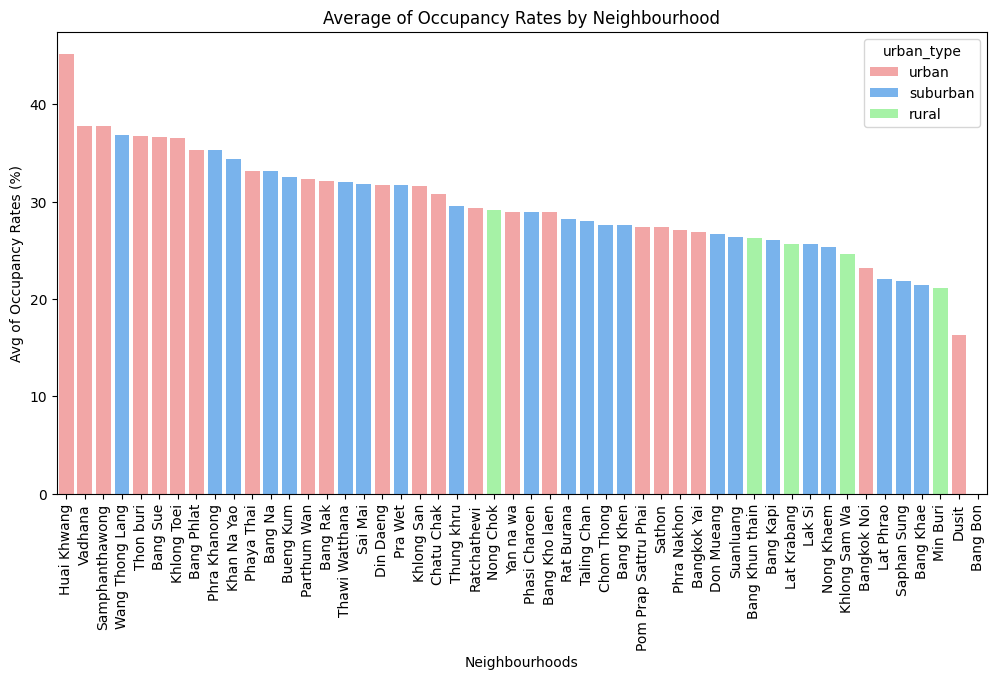

In [48]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the bar chart with custom colors
sns.barplot(x='neighbourhood', y='occupancy_rate', data=neighbourhood_occupancy, hue='urban_type', palette=colors)

# Adding labels and title
plt.xlabel('Neighbourhoods')
plt.ylabel('Avg of Occupancy Rates (%)')
plt.title('Average of Occupancy Rates by Neighbourhood')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [49]:
def occupancy(neighbourhood):
    if neighbourhood['occupancy_rate'] > 32.5:
        return 'Market Leader'
    elif (neighbourhood['occupancy_rate'] < 32.5) and (neighbourhood['occupancy_rate'] > 26.25):
        return 'Rising Star'
    else:
        return 'Hidden Gem'

neighbourhood_occupancy['category'] = neighbourhood_occupancy.apply(occupancy,axis=1)
display(neighbourhood_occupancy.head())
display(neighbourhood_occupancy.tail())

urban_type    neighbourhood  occupancy_rate       category
37      urban      Huai Khwang       45.155031  Market Leader
48      urban          Vadhana       37.732176  Market Leader
45      urban   Samphanthawong       37.719474  Market Leader
27   suburban  Wang Thong Lang       36.786100  Market Leader
47      urban        Thon buri       36.710604  Market Leader

urban_type neighbourhood  occupancy_rate    category
22   suburban   Saphan Sung       21.887333  Hidden Gem
7    suburban     Bang Khae       21.482283  Hidden Gem
4       rural      Min Buri       21.143710  Hidden Gem
36      urban         Dusit       16.314725  Hidden Gem
0       rural      Bang Bon        0.000000  Hidden Gem

>- Urban Type dan Lokasi adalah faktor yang sangat mempengaruhi tingkat hunian dari suatu listing. Kawasan perkotaan seperti Huai Khwang, Vadhana, dan Samphanthawong menunjukkan performa yang sangat baik dalam hal occupancy rate, menandakan bahwa investasi di kawasan ini mungkin lebih menguntungkan.
>- Tipe Rural cenderung memiliki performa yang lebih rendah, yang bisa menjadi area untuk peningkatan atau perluasan strategi pemasaran untuk meningkatkan daya tarik.
>- Neighbourhood Spesifik dengan occupancy rate rendah (seperti Bang Bon) mungkin memerlukan analisis lebih lanjut untuk memahami mengapa performa mereka tidak sebaik kawasan lain, dan apakah ada peluang untuk peningkatan

berikut adalah occupancy rate per kawasan

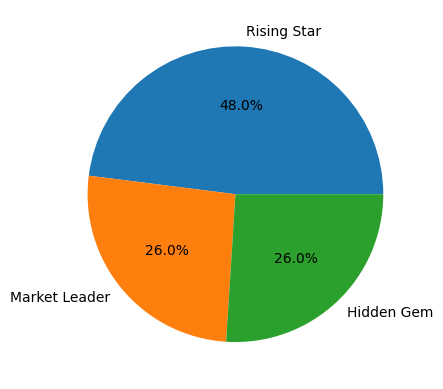

In [50]:
persentase_occ = neighbourhood_occupancy['category'].value_counts()/len(neighbourhood_occupancy)*100
plt.pie(persentase_occ, labels = persentase_occ.index, autopct = '%1.1f%%')
plt.show()

> Hidden Gem (0% - 26.25% ):

Properti ini adalah "permata tersembunyi" yang belum ditemukan oleh banyak tamu yang meskipun tingkat hunian rendah, ada potensi besar jika strategi yang tepat diterapkan. Fokus pada meningkatkan visibilitas, penyesuaian harga, dan promosi untuk mengubah properti ini menjadi lebih menarik di mata calon tamu.

> Rising Star (26.25% - 32.4%):

Properti ini adalah "bintang yang sedang naik daun," menunjukkan pertumbuhan yang signifikan dalam tingkat hunian. Properti sudah berada di jalur yang benar dan mulai mendapatkan perhatian pasar. Ini adalah waktu yang tepat untuk memperkuat strategi pemasaran dan mempertahankan momentum. Dengan sedikit dorongan, properti ini bisa mencapai performa puncaknya.

> Market Leader (> 32.5%):

Properti ini adalah "pemimpin pasar," sepenuhnya memanfaatkan permintaan dan mencapai atau melampaui tingkat hunian optimal.
Properti ini sangat diminati dan berada dalam posisi yang sangat baik di pasar. Fokus utama sekarang adalah mempertahankan performa ini dan terus menawarkan pengalaman yang luar biasa kepada tamu untuk memastikan loyalitas dan permintaan yang terus menerus.

### - Menghitung occupancy rate per listing

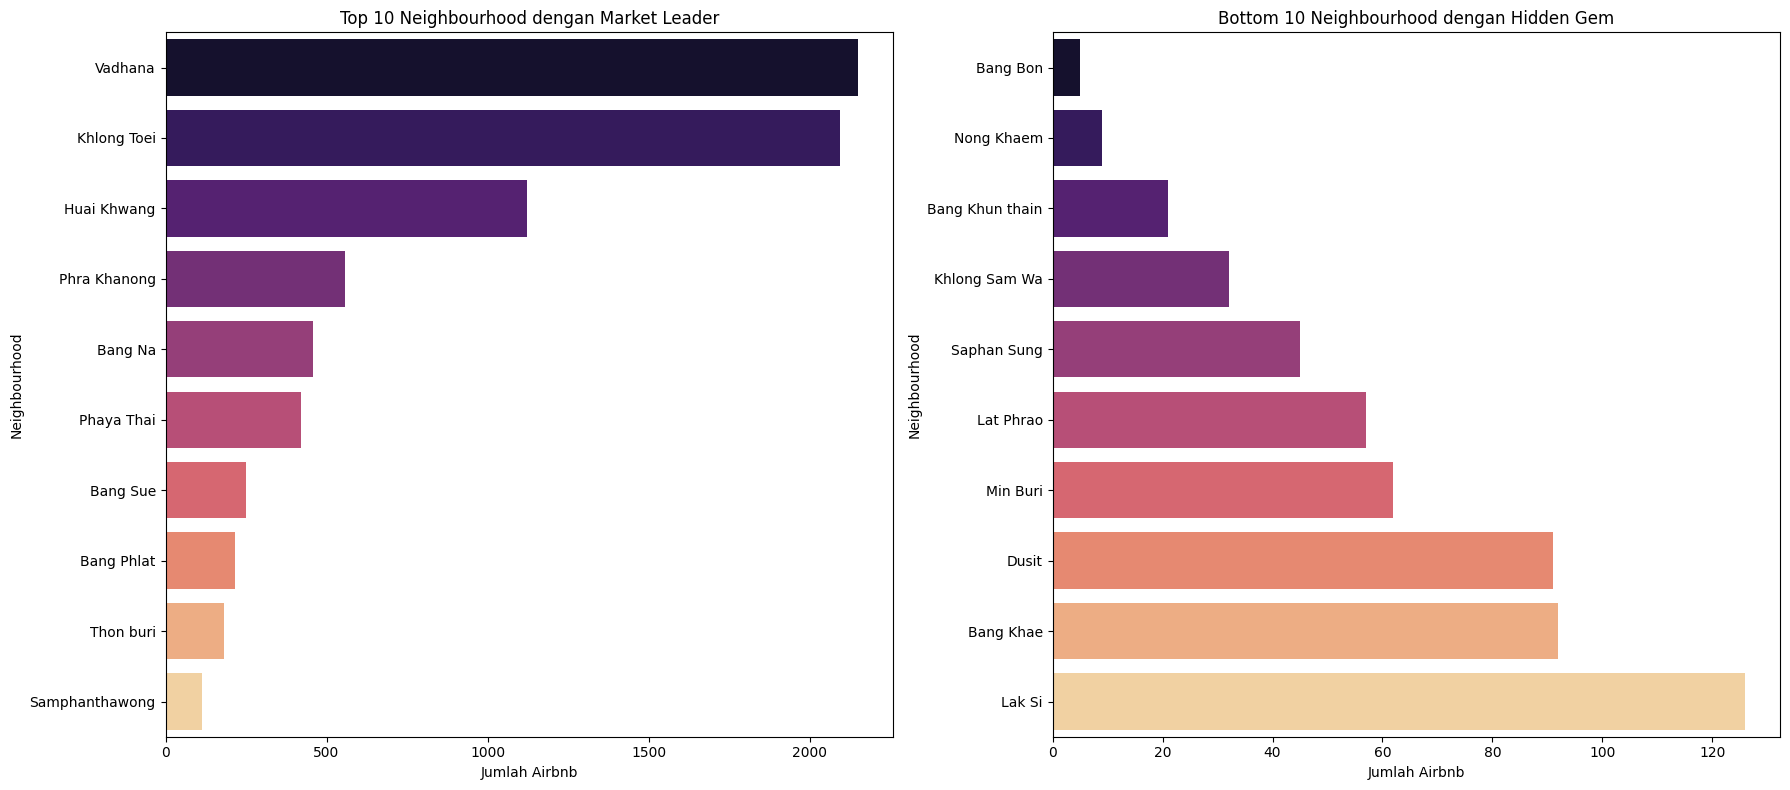

In [51]:
# Menggabungkan data_clean dengan neighbourhood_occupancy berdasarkan 'neighbourhood'
merged_data = pd.merge(data_clean, neighbourhood_occupancy, on='neighbourhood', how='left')

# Pisahkan data berdasarkan kategori 'Segmentasi occupancy'
market_leader = merged_data[merged_data['category'] == 'Market Leader']
hidden_gem = merged_data[merged_data['category'] == 'Hidden Gem']

# Menghitung jumlah listing berdasarkan neighbourhood untuk 'Market Leader'
market_leader_count = market_leader['neighbourhood'].value_counts().reset_index()
market_leader_count.columns = ['Neighbourhood', 'Count']
market_leader_count = market_leader_count.sort_values(by='Count', ascending=False)
top_10_market_leader = market_leader_count.head(10)

# Menghitung jumlah listing berdasarkan neighbourhood untuk 'Hidden Gem'
hidden_gem_count = hidden_gem['neighbourhood'].value_counts().reset_index()
hidden_gem_count.columns = ['Neighbourhood', 'Count']
hidden_gem_count = hidden_gem_count.sort_values(by='Count', ascending=True)
bottom_10_hidden_gem = hidden_gem_count.head(10)

# Buat subplot untuk dua grafik
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot untuk Top 10 'Market Leader'
sns.barplot(data=top_10_market_leader, x='Count', y='Neighbourhood', hue='Neighbourhood', palette='magma', ax=axes[0], dodge=False, legend=False)
axes[0].set_title('Top 10 Neighbourhood dengan Market Leader')
axes[0].set_xlabel('Jumlah Airbnb')
axes[0].set_ylabel('Neighbourhood')

# Plot untuk Bottom 10 'Hidden Gem'
sns.barplot(data=bottom_10_hidden_gem, x='Count', y='Neighbourhood', hue='Neighbourhood', palette='magma', ax=axes[1], dodge=False, legend=False)
axes[1].set_title('Bottom 10 Neighbourhood dengan Hidden Gem')
axes[1].set_xlabel('Jumlah Airbnb')
axes[1].set_ylabel('Neighbourhood')

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


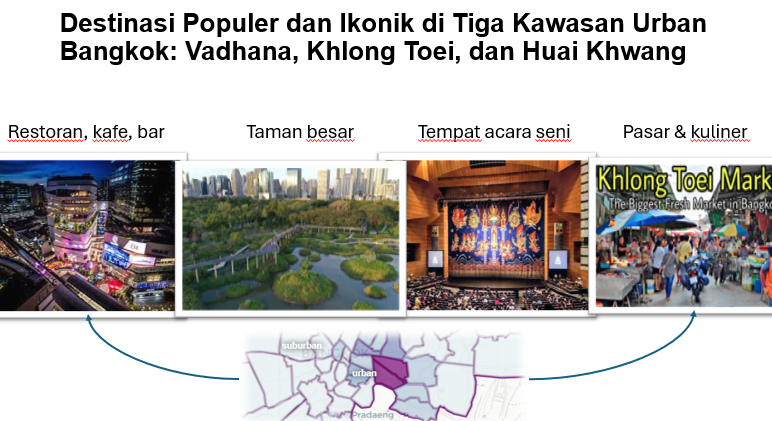

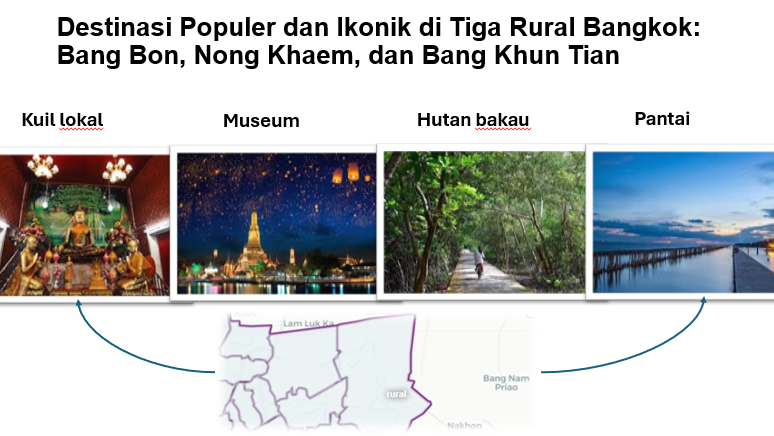

In [52]:
# Mempersiapkan listing yang akan dianalisa
analisa = merged_data[merged_data['neighbourhood'].isin(['Vadhana', 'Khlong Toei', 'Huai Khwang', 'Bang Bon', 'Nong Khaem', 'Bang Khun thain'])]
print(f'Jumlah listing: {analisa.shape[0]}')
analisa.head()
# analisa.to_excel('3. hargakamar urban rural.xlsx')
# display(analisa.head(5))
# display(analisa.tail(5))


Jumlah listing: 5404


id                                 name  host_id host_name  \
14   959254.0   Deluxe Condo, Nana, Pool/GYM/Sauna  5153476    Natcha   
16  1791481.0  Nice and Quiet condo near BTS Onnut  9399478  Piyakorn   
18   105042.0  Central Bangkok 3 Bedroom Apartment   545890     Henry   
19  1793000.0     The Duplex - Asoke- Luxury 92sqm  9407280      Timo   
22   965722.0        Siamese Gioia on Sukhumvit 31  5265861  Chuchart   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
14   Khlong Toei  13.71516  100.56806  Entire home/apt   1400              30   
16   Khlong Toei  13.70719  100.59936  Entire home/apt   1577              30   
18   Khlong Toei  13.73378  100.56303  Entire home/apt   5680              28   
19       Vadhana  13.74668  100.56137  Entire home/apt   5034              21   
22       Vadhana  13.74444  100.57003     Private room   3775              30   

    number_of_reviews  calculated_host_listings_count  availability_365  \
14                  0                               1               365   
16                 78                               1               330   
18                148                               1               334   
19                287                               1               349   
22                  3                               1               364   

    number_of_reviews_ltm  nights_booked  occupancy_rate_x urban_type_x  \
14                      0              0              0.00        urban   
16                      0             35              9.59        urban   
18                      0             31              8.49        urban   
19                      3             16              4.38        urban   
22                      0              1              0.27        urban   

   urban_type_y  occupancy_rate_y       category  
14        urban         36.489026  Market Leader  
16        urban         36.489026  Market Leader  
18        urban         36.489026  Market Leader  
19        urban         37.732176  Market Leader  
22        urban         37.732176  Market Leader

**Pengamatan**
>- Kawasan urban seperti `Vadhana, Khlong Toei, dan Huai Khwang mendominasi kategori Market Leader` [Destinasi populer Bangkok](https://www.tripadvisor.co.id/Attractions-g293916-Activities-Bangkok.html)
>- Kawasan seperti `Lak Si, Bang Khae, dan Dusit` yang berada dalam kategori `Hidden Gem` menunjukkan bahwa ada potensi untuk pengembangan lebih lanjut di kawasan ini. Mungkin dengan peningkatan fasilitas atau promosi, kawasan ini bisa menarik lebih banyak penyewa dan meningkatkan performa mereka.

>- Perbandingan antara top 10 dan bottom 10 menunjukkan perbedaan besar dalam performa antara neighbourhood yang berbeda. Ini bisa digunakan untuk mengidentifikasi `faktor-faktor yang membuat beberapa kawasan lebih sukses daripada yang lain dan menerapkan strategi serupa di kawasan yang berkinerja rendah`.

### - Tipe kamar per kawasan

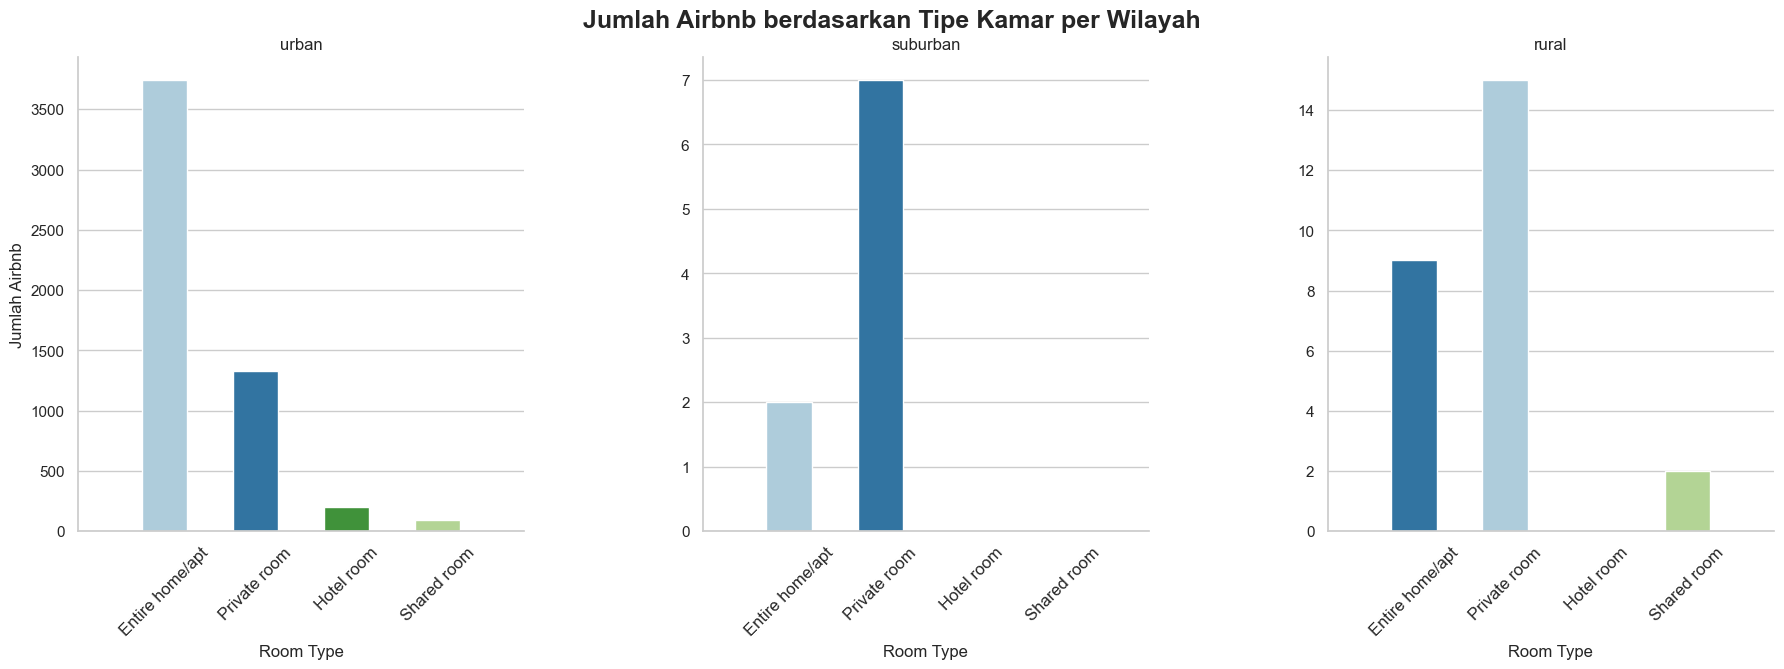

In [53]:
# Set the theme for better readability
sns.set_theme(style="whitegrid")

# Membuat FacetGrid berdasarkan urban_type dengan ukuran figure yang lebih besar
g = sns.FacetGrid(analisa, col='urban_type_x', col_wrap=3, height=6, sharey=False)

# Memetakan countplot untuk setiap urban_type, menetapkan hue sebagai room_type, dan menyesuaikan lebar bar
g.map_dataframe(sns.countplot, x='room_type', hue='room_type', 
                order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], 
                palette='Paired', width=0.5, legend=False)  # Lebar bar lebih kecil untuk lebih banyak ruang antar barchart

# Mengatur judul untuk setiap subplot
g.set_titles(col_template="{col_name}")

# Mengatur label sumbu x dan y
g.set_axis_labels('Room Type', 'Jumlah Airbnb')

# Menambahkan rotasi pada label x dengan menggunakan tick_params
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45, labelsize=12)  # Memutar dan memperbesar label x
    ax.margins(x=0.2)  # Menambahkan margin lebih besar di sumbu x untuk memberikan lebih banyak ruang antar barchart

# Menyesuaikan ruang di atas subplots dan menambahkan judul utama
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)

# Menambahkan judul utama di tengah
plt.suptitle('Jumlah Airbnb berdasarkan Tipe Kamar per Wilayah', fontsize=18, fontweight='bold', x=0.5)

# Menampilkan plot
plt.show()


>- Preferensi Pasar: Di wilayah urban, "Entire Home/Apartment" adalah pilihan paling populer, sementara di wilayah suburban dan rural, "Private Room" menjadi pilihan dominan. Ini mencerminkan perbedaan preferensi penyewa di berbagai jenis lingkungan.
>- Implikasi bagi Pemilik Properti: Pemilik properti di wilayah urban mungkin ingin fokus pada menawarkan entire home/apartment untuk memaksimalkan pendapatan.

`Faktor wisatawan memesan akomodasi tidak sepenuhnya bergantung pada harga,namun juga ekslisivitas dan kenyamanan`

### - Cek Harga akomodasi

Median Price

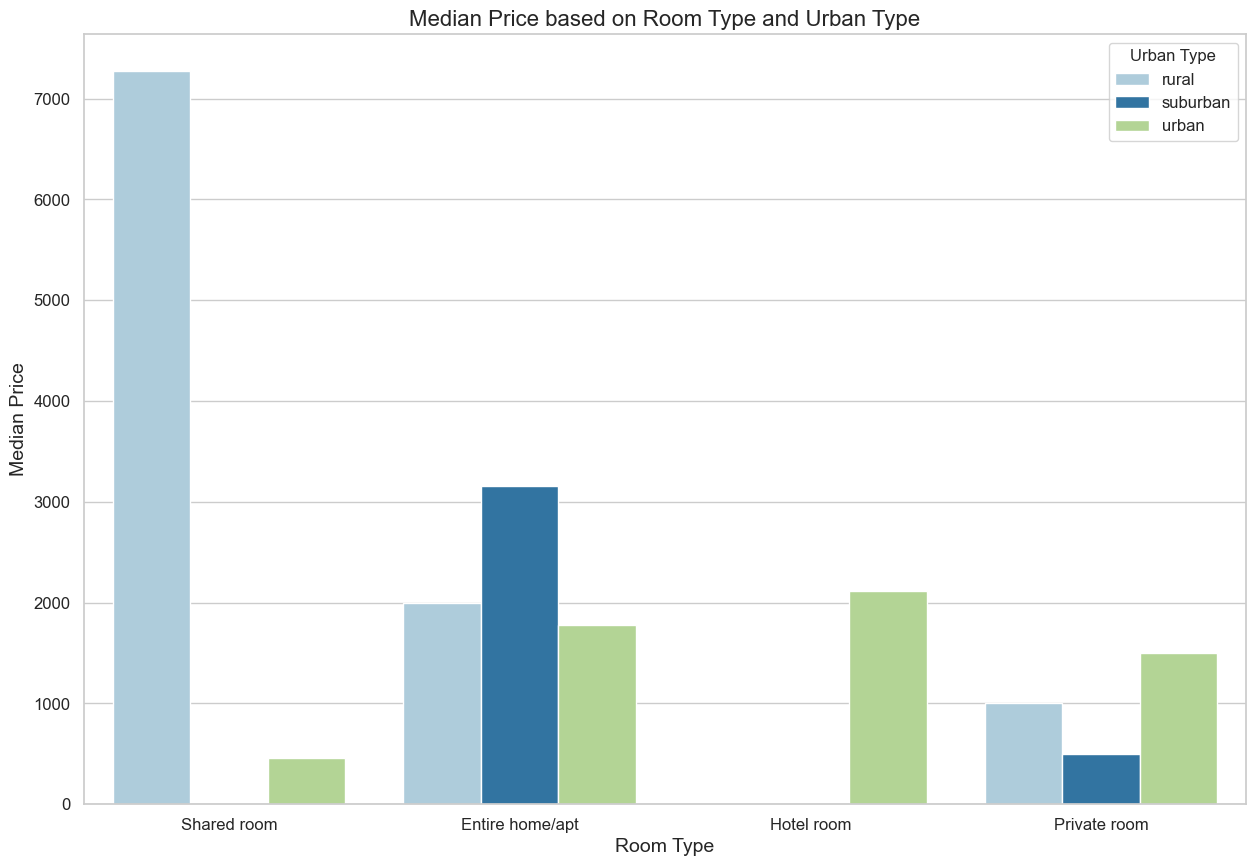

In [54]:
# Menghitung median harga berdasarkan urban_type dan room_type
median_prices = analisa.groupby(['urban_type_x', 'room_type'])['price'].median().reset_index()

# Mengurutkan data frame berdasarkan median harga secara menurun
room_type_order = median_prices.sort_values(by='price', ascending=False)['room_type']

# Plot bar plot horizontal dengan data frame utuh
plt.figure(figsize=(15, 10))  # Memperlebar ukuran plot secara horizontal
sns.barplot(y='price', x='room_type', hue='urban_type_x', palette='Paired', data=median_prices, order=room_type_order, errorbar=None)

# Mengatur judul dan label sumbu
plt.title('Median Price based on Room Type and Urban Type', fontsize=16)  
plt.ylabel('Median Price', fontsize=14)  
plt.xlabel('Room Type', fontsize=14)  

# Menyesuaikan legenda dan label sumbu
plt.legend(title='Urban Type', fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# Menampilkan plot
plt.show()


In [55]:
median_prices.sort_values(by='price',ascending=False)

urban_type_x        room_type   price
2        rural      Shared room  7276.0
3     suburban  Entire home/apt  3160.5
6        urban       Hotel room  2111.5
0        rural  Entire home/apt  2000.0
5        urban  Entire home/apt  1773.0
7        urban     Private room  1500.0
1        rural     Private room   999.0
4     suburban     Private room   501.0
8        urban      Shared room   455.0

**Pengamatan**
>- Harga Tertinggi: Di wilayah rural, harga untuk shared room signifikan lebih tinggi, disebabkan oleh faktor unik tertentu seperti eksklusivitas
>- Harga di Suburban: Entire home/apartment di wilayah suburban memiliki harga yang lebih tinggi dibandingkan dengan urban, menunjukkan bahwa ada nilai tambah tertentu yang mungkin berkaitan dengan ruang lebih luas atau lingkungan yang lebih tenang.
>- Private Room: Tipe kamar private room memiliki variasi harga yang berbeda di semua wilayah, dengan harga terendah di suburban dan tertinggi di urban.

## 3. Strategi harga

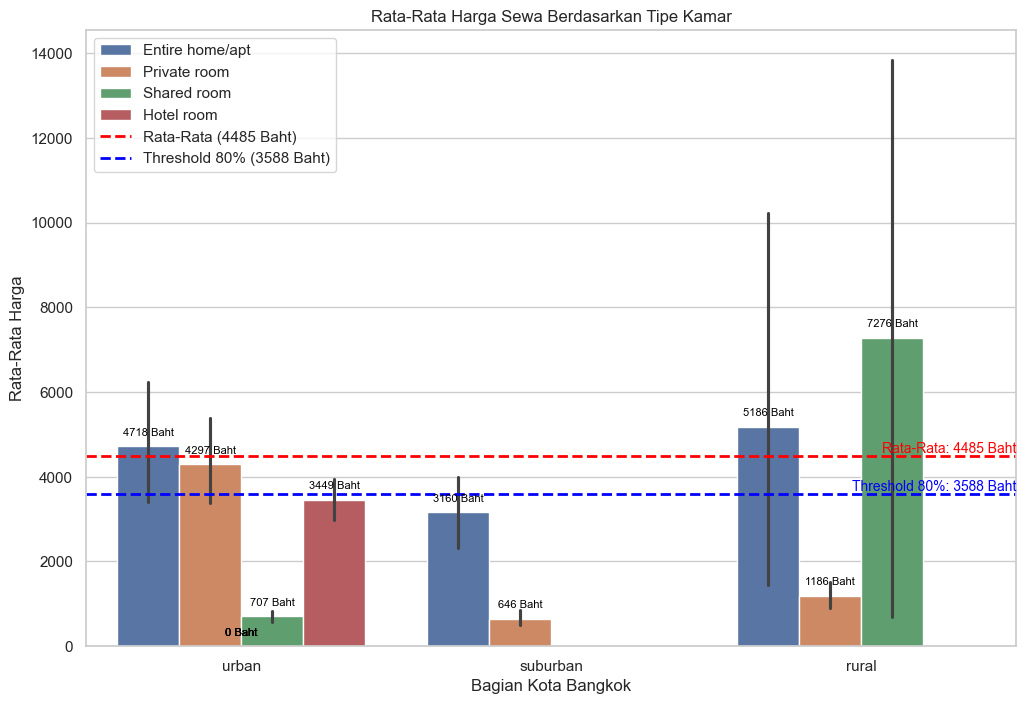

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x='urban_type_x', y='price', hue='room_type', data=analisa.reset_index())

# Menghitung rata-rata dan threshold 80%
mean_price = analisa['price'].mean()
threshold_80 = mean_price * 0.8

# Menambahkan garis rata-rata
plt.axhline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Rata-Rata ({int(mean_price)} Baht)')
# Menambahkan label untuk garis rata-rata
plt.text(plt.gca().get_xlim()[1], mean_price, f'Rata-Rata: {int(mean_price)} Baht', 
         color='red', ha='right', va='bottom', fontsize=10)

# Menambahkan garis threshold 80%
plt.axhline(threshold_80, color='blue', linestyle='--', linewidth=2, label=f'Threshold 80% ({int(threshold_80)} Baht)')
# Menambahkan label untuk garis threshold 80%
plt.text(plt.gca().get_xlim()[1], threshold_80, f'Threshold 80%: {int(threshold_80)} Baht', 
         color='blue', ha='right', va='bottom', fontsize=10)

# Menambahkan label pada bar
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())} Baht"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

# Menambahkan title dan label sumbu
plt.title('Rata-Rata Harga Sewa Berdasarkan Tipe Kamar')
plt.xlabel('Bagian Kota Bangkok')
plt.ylabel('Rata-Rata Harga')

plt.legend()
plt.show()


**Pengamatan**

>- Analisis harga menggunakan 80% dari rata-rata adalah cara untuk mendapatkan pemahaman yang lebih seimbang tentang distribusi harga, menghindari pengaruh dari outliers. Melalui grafik, 80% dari rata-rata harga berada pada 3588 Baht per listing

In [67]:
analisa[(analisa['urban_type_x'] == 'rural')&(analisa['room_type'] == 'Shared room') ].sort_values(by='price',ascending=False)[['neighbourhood','price','urban_type_x','room_type','category']]

neighbourhood  price urban_type_x    room_type    category
5577  Bang Khun thain  13852        rural  Shared room  Hidden Gem
8984  Bang Khun thain    700        rural  Shared room  Hidden Gem


>- Harga tertinggi ditemukan pada shared room di wilayah rural. Ini sangat tidak biasa, namun berdasarkan sumber yang saya baca, salah satu daerah rural, `Bung khun Thain` sedang dalam pengembangan, dan secara langsung berdampak pada tarif properti. [referensi](https://m82.doh-motorway.com/en/project-overview/project-status/)

Walaupun rata-rata occupancy rate dari wilayah Bang Khun thain rendah, ternyata terdapat satu listing menarik yang memiliki occupancy hingga 75.34%. Sehingga dapat disimpulkam bahwa daerah yang dikategorikan sebagai hidden Gem ternyata ada juga memiliki listing 'Market Leader'

Referensi harga Listing kawasan [Bang Khun thain](https://en.wikipedia.org/wiki/Bang_Khun_Thian_district) 

In [68]:
# Menghitung tarif per malam untuk setiap listing
data_clean['tarif_per_malam'] = data_clean['price'] / data_clean['minimum_nights']

# Mengelompokkan data berdasarkan 'neighbourhood' dan 'room_type', dan menghitung rata-rata tarif per malam per kombinasi tersebut
data_price = data_clean.groupby(by=['neighbourhood', 'room_type'])['tarif_per_malam'].mean().reset_index()

# Mengonversi hasil pengelompokan ke dalam DataFrame
df = pd.DataFrame(data_price)

# Menampilkan DataFrame hasil
df



neighbourhood        room_type  tarif_per_malam
0           Bang Bon  Entire home/apt      1042.857143
1           Bang Bon     Private room      1440.666667
2          Bang Kapi  Entire home/apt       951.829737
3          Bang Kapi       Hotel room        21.428571
4          Bang Kapi     Private room      4223.581988
..               ...              ...              ...
163  Wang Thong Lang      Shared room       696.296296
164        Yan na wa  Entire home/apt      1825.316313
165        Yan na wa       Hotel room      7085.750000
166        Yan na wa     Private room      1870.328730
167        Yan na wa      Shared room       599.166667

[168 rows x 3 columns]

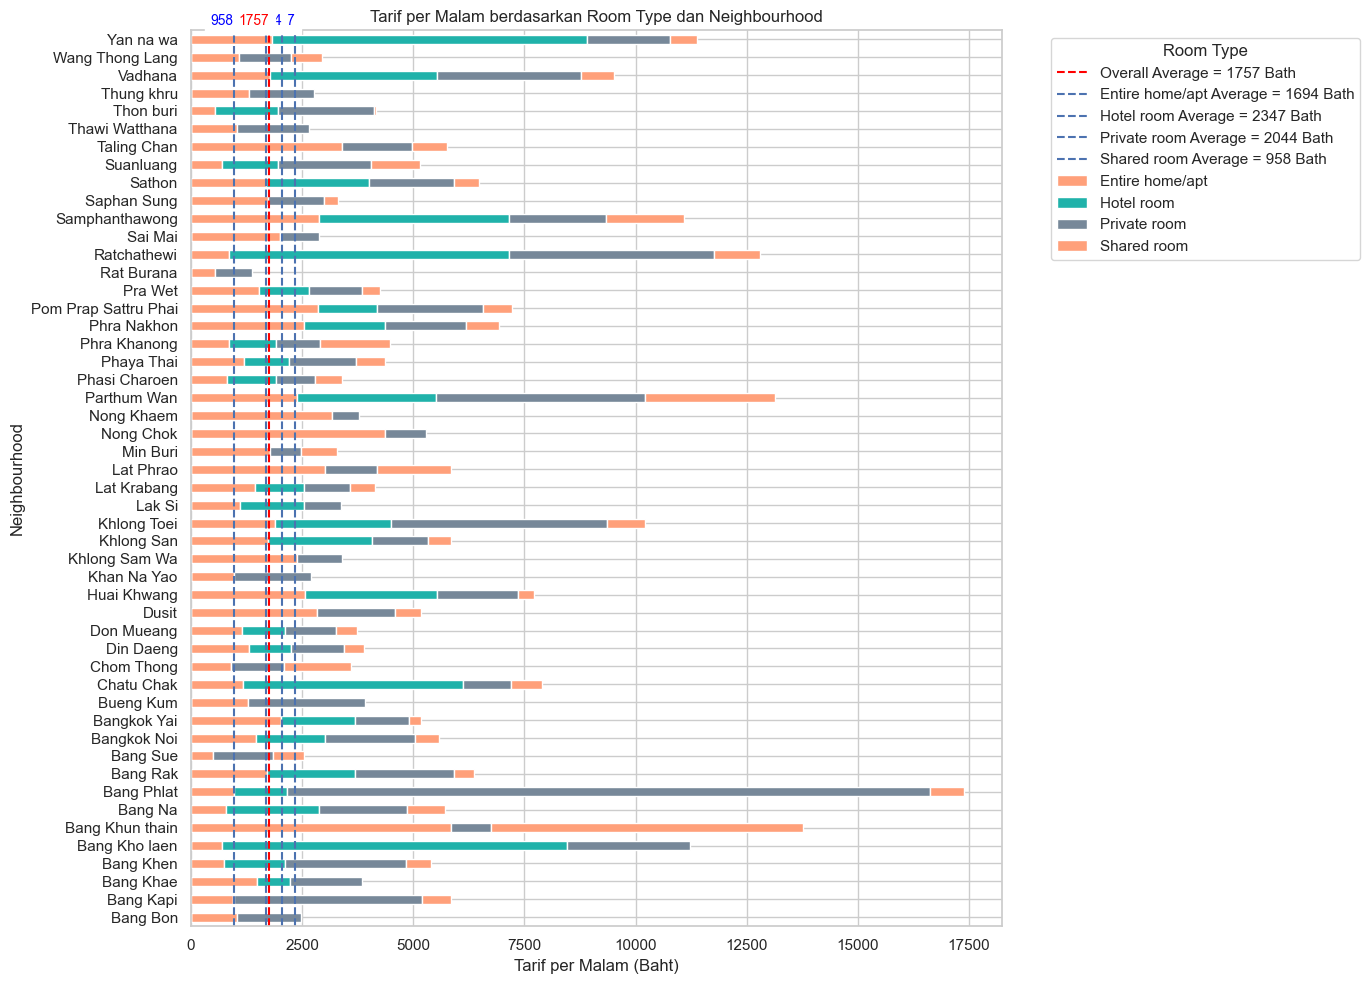

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung rata-rata tarif per malam berdasarkan neighbourhood dan room_type
grouped = df.groupby(['neighbourhood', 'room_type'])['tarif_per_malam'].mean().unstack()

# Menghitung rata-rata tarif keseluruhan
overall_average = df['tarif_per_malam'].mean()

# Menghitung rata-rata tarif per room_type
room_type_averages = df.groupby('room_type')['tarif_per_malam'].mean()

# Membuat plot
plt.figure(figsize=(14, 10))
grouped.plot(kind='barh', stacked=True, ax=plt.gca(), color=['#FFA07A', '#20B2AA', '#778899'])  # Customize colors as needed

# Menambahkan garis rata-rata keseluruhan
plt.axvline(overall_average, color='red', linestyle='--', label=f'Overall Average = {overall_average:.0f} Bath')

# Menambahkan garis rata-rata per tipe kamar dan labelnya
for room_type, avg in room_type_averages.items():
    plt.axvline(avg, linestyle='--', label=f'{room_type} Average = {avg:.0f} Bath')
    plt.text(avg, len(grouped), f'{avg:.0f}', va='center', ha='right', color='blue', fontsize=10, backgroundcolor='white')

# Menambahkan label untuk overall average
plt.text(overall_average, len(grouped), f'{overall_average:.0f}', va='center', ha='right', color='red', fontsize=10, backgroundcolor='white')

# Menambahkan title dan label sumbu
plt.title('Tarif per Malam berdasarkan Room Type dan Neighbourhood')
plt.xlabel('Tarif per Malam (Baht)')
plt.ylabel('Neighbourhood')

plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Rata-rata Tarif permalam berdasarkan Room type dan neighbourhood senilai 1757 baht

# **Kesimpulan**

>- Jumlah listing terbanya berada pada area Urban

>- Area urban di Bangkok, seperti Vadhana, Khlong Toei, dan Huai Khwang, mendominasi pasar Airbnb dengan jumlah listing yang signifikan dan tingkat hunian yang tinggi. Ini menandakan bahwa kawasan perkotaan ini merupakan pilihan utama bagi wisatawan.

>- Area suburban dan rural memiliki jumlah listing dan tingkat hunian yang lebih rendah dibandingkan area urban. Namun, terdapat beberapa kawasan suburban, seperti Phra Khanong, yang menunjukkan performa lebih baik. Daerah rural cenderung memiliki performa yang lebih rendah, namun ada listing unik di wilayah ini yang menunjukkan potensi besar.

>- Preferensi Akomodasi: Di wilayah urban, "Entire Home/Apartment" adalah pilihan yang paling populer, sementara di wilayah suburban dan rural, "Private Room" menjadi pilihan dominan. Ini mencerminkan perbedaan preferensi penyewa di berbagai jenis lingkungan, di mana penyewa di area urban cenderung mencari privasi dan kenyamanan.

>- Terdapat perbedaan harga yang signifikan antara wilayah urban, suburban, dan rural. Wilayah urban secara keseluruhan memiliki harga yang lebih tinggi, kecuali untuk shared room di wilayah rural yang memiliki harga yang sangat tinggi. Hal ini menunjukkan adanya fitur unik atau kelangkaan pilihan di daerah tersebut. Harga untuk entire home/apartment yang tinggi di semua wilayah menunjukkan permintaan yang konsisten untuk tipe properti ini.

>- 80% dari harga per listing berada pada harga 3588 baht, sementara rata-rata tarif per malamnya berada pada 1757 baht


# **Rekomendasi Bisnis**

>- Optimalisasi Harga dan Penawaran

Sebaiknya tiap host menetapkan harga yang kompetitif berdasarkan analisis mendalam terhadap tarif rata-rata per listing dan per malam di berbagai Neighbourhood. Pemilik properti dapat menggunakan strategi penetapan harga dinamis yang menyesuaikan tarif berdasarkan permintaan, musim, dan acara lokal, atau menyediakan diskon untuk pemesanan jangka panjang atau menawarkan paket spesial selama musim rendah (low season) untuk menarik lebih banyak tamu. 

Melalui analisa, mayoritas tarif berdasarkan `Neighbourhood` berada di kisaran 80% dari rata-rata tarif per listing adalah 3588 bahtdan rata-rata tarif per malam 1757 Bath. Angka ini dapat dijadikan patokan bagi para host untuk menentukan harga pasar.

>- Kolaborasi dengan Bisnis Lokal

Hasil analisa yang mengerucut pada harga listing tertinggi berada pada area yang jauh dari pusat kota `rural`, namun juga memiliki occupancy hingga 75%, maka sebaiknya host menjalin  kerjasama dengan tempat kuliner, tempat wisata, atau penyedia layanan lokal, bisnis Airbnb Bangkok dapat memberikan customer touchpoint yang berkesan dengan keunikan atau ciri khas area Bangkok. Salah satu caranya adalah dengan mengikuti acara lokal atau festival dengan menawarkan paket khusus yang menggabungkan penginapan dengan akses ke acara-acara tersebut.
    
>- Pemasaran Digital dan Branding

Menargetkan kelompok wisatawan tertentu melalui pemasaran digital, dan membangun merek yang kuat di pasar lokal dan internasional. Misalnya wisatawan backpacker mungkin lebih tertarik pada akomodasi yang terjangkau dan berlokasi dekat dengan tempat-tempat menarik, sementara pelancong bisnis mungkin memprioritaskan fasilitas kerja dan kenyamanan, mementingkan eksklusifitas. Pertimbangan harga rata-rata tarif per malam yang dapat dijadikan patokan adalah:
>- Entire home/apt = 1694 baht
>- Hotel room = 2347 baht
>- Private room = 2044 baht
>- shared room = 958 baht



# Dashboard Tableu

https://public.tableau.com/views/v1_M2_Airbnb_Listings_Bangkok_Irma/Pricedistribution?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

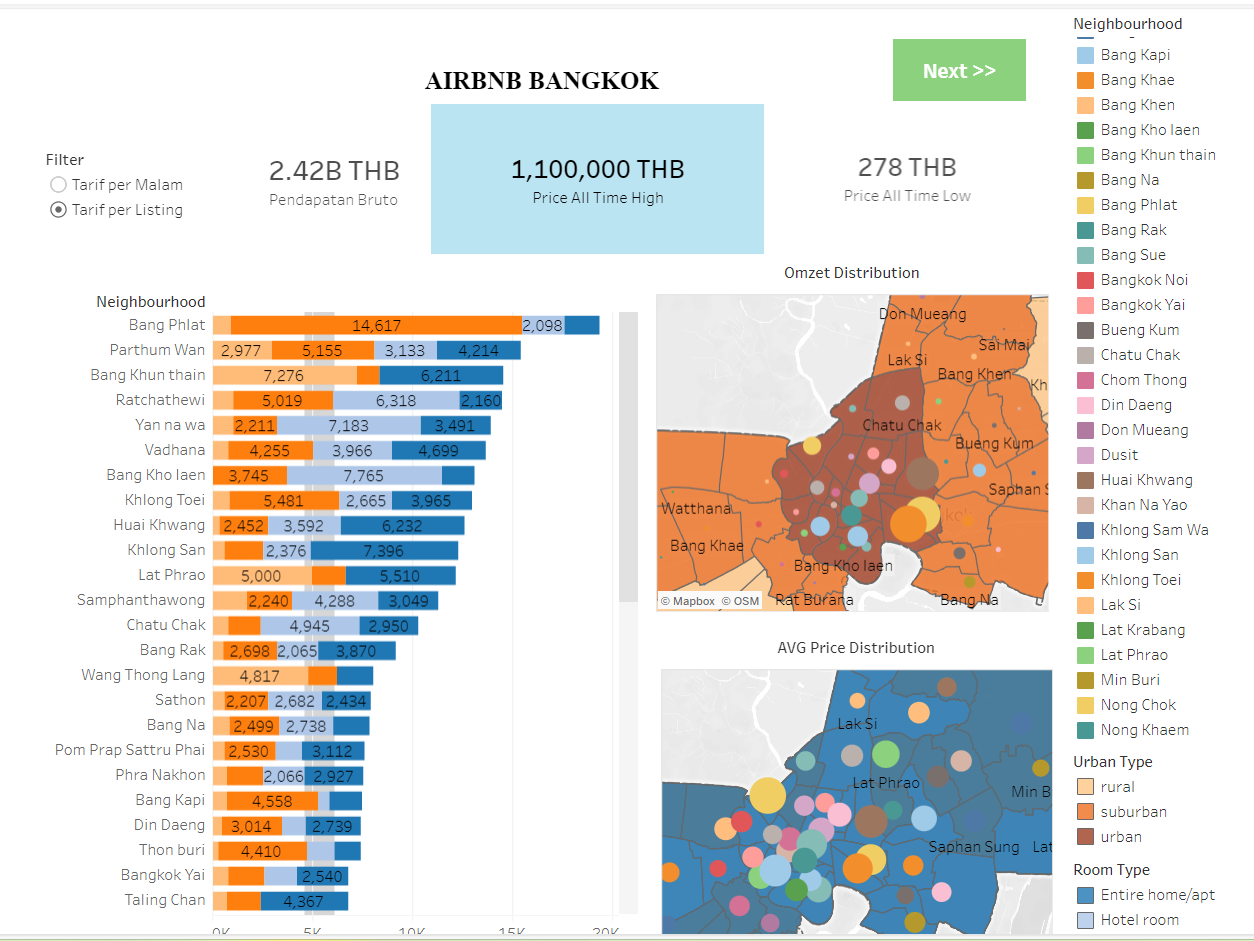

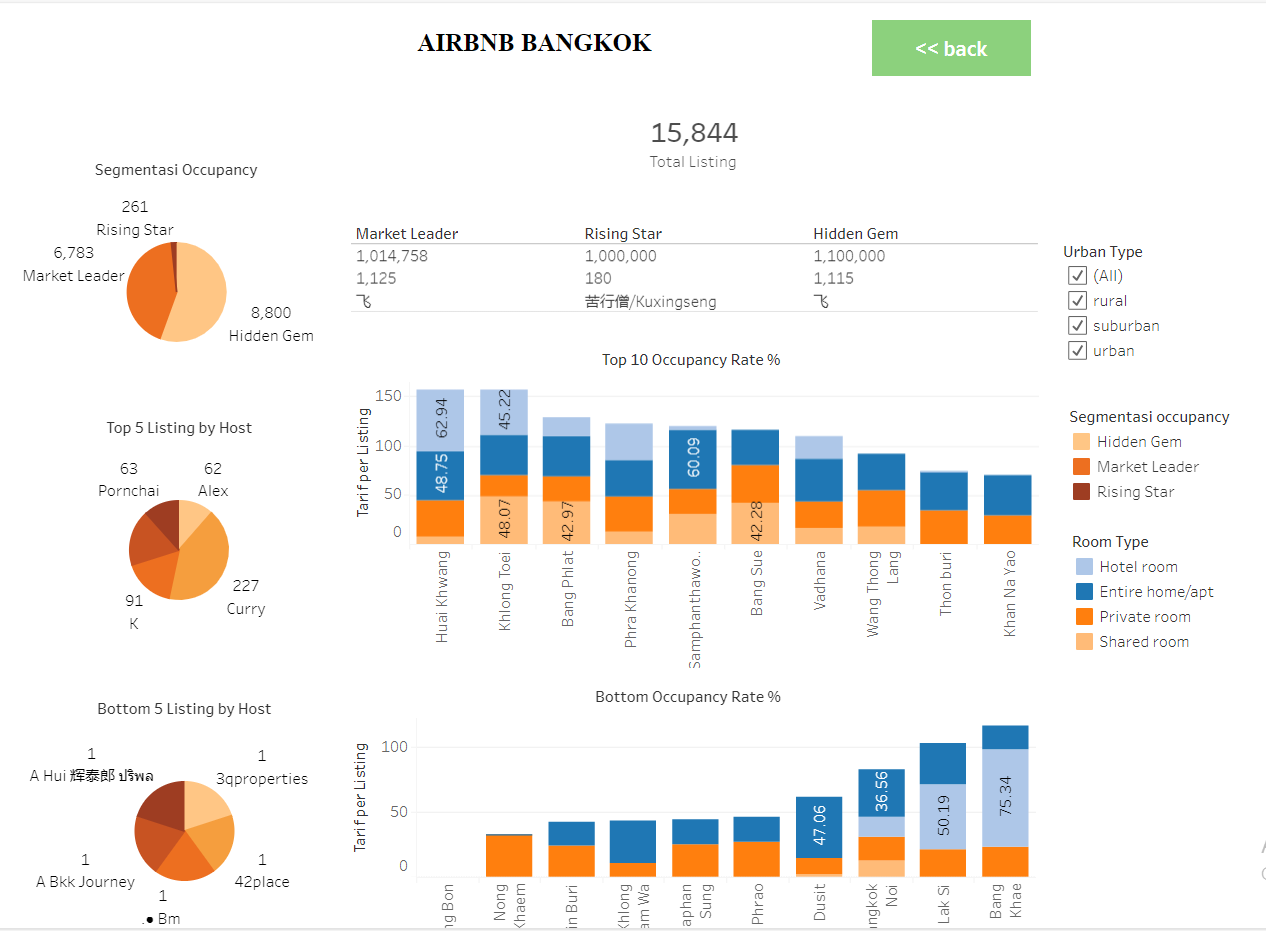